In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from genieclust import Genie
from sklearn.cluster import DBSCAN

import numpy as np
import clustbench
import genieclust
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
sipu_collection = [
    'a1', 
    'a2', 
    'a3', 
    'aggregation', 
    'compound', 
    'd31', 
    'r15', 
    'flame', 
    'jain', 
    'pathbased', 
    'spiral', 
    's1', 
    's2', 
    's3', 
    's4', 
    'unbalance'
    ]

In [3]:
for sip in sipu_collection: 
    print("################")
    print("DATASET: ", sip)
    benchmark = clustbench.load_dataset("sipu", sip, url="https://github.com/gagolews/clustering-data-v1/raw/v1.1.0")
    print(benchmark.data.shape)

################
DATASET:  a1
(3000, 2)
################
DATASET:  a2
(5250, 2)
################
DATASET:  a3
(7500, 2)
################
DATASET:  aggregation
(788, 2)
################
DATASET:  compound
(399, 2)
################
DATASET:  d31
(3100, 2)
################
DATASET:  r15
(600, 2)
################
DATASET:  flame
(240, 2)
################
DATASET:  jain
(373, 2)
################
DATASET:  pathbased
(300, 2)
################
DATASET:  spiral
(312, 2)
################
DATASET:  s1
(5000, 2)
################
DATASET:  s2
(5000, 2)
################
DATASET:  s3
(5000, 2)
################
DATASET:  s4
(5000, 2)
################
DATASET:  unbalance
(6500, 2)


In [4]:
dbscan_models = {
    "a1": DBSCAN(min_samples=7, eps=0.061111), 
    'a2':  DBSCAN(min_samples=4, eps=	0.047888	), 
    'a3':  DBSCAN(min_samples=10, eps=0.061540		), 
    'aggregation':  DBSCAN(min_samples=7, eps=0.144697	), 
    'compound':  DBSCAN(min_samples=6, eps=0.170477	), 
    'd31':  DBSCAN(min_samples=10, eps=0.085117), 
    'r15':  DBSCAN(min_samples=9, eps=0.126741), 
    'flame':  DBSCAN(min_samples=8, eps=0.163551), 
    'jain':  DBSCAN(min_samples=4, eps=0.235065	), 
    'pathbased':  DBSCAN(min_samples=5, eps=0.248905), 
    'spiral':  DBSCAN(min_samples=4, eps=0.277380	), 
    's1':  DBSCAN(min_samples=10, eps=0.113822), 
    's2':  DBSCAN(min_samples=9, eps=0.095061), 
    's3':  DBSCAN(min_samples=10, eps=0.091968), 
    's4':  DBSCAN(min_samples=7, eps=0.092762), 
    'unbalance': DBSCAN(min_samples=4, eps=0.120815)
}
models = [
    ("K-means", KMeans()),
    ("Genie 0.1", Genie(gini_threshold = 0.1)),
    ("Genie 0.3", Genie(gini_threshold = 0.3)),
    ("Genie 0.5", Genie(gini_threshold = 0.5)),
    ("Genie 0.7", Genie(gini_threshold = 0.7)),
    ("Genie 0.9", Genie(gini_threshold = 0.9)),
    ("Agglo single", AgglomerativeClustering(linkage='single')),#Agglomerative Clustering single
    ("Agglo average", AgglomerativeClustering(linkage='average')),#Agglomerative Clustering average
    ("Agglo complete", AgglomerativeClustering(linkage='complete')),#Agglomerative Clustering complete
    ("Agglo ward", AgglomerativeClustering(linkage='ward')),#Agglomerative Clustering ward
    ("DBSCAN", dbscan_models )
]


In [23]:
def fit_evaluate(b, models, seed=42):
    if b.data.shape[0] <= 10000: 
        data = b.data
        labels = b.labels
    else:
        np.random.seed(seed)
        indices = np.random.choice(b.data.shape[0], 10000, replace=False)
        data = b.data[indices]
        labels =[b.labels[0][indices]]
        print("Above 10 000", sip)
    res={"Orginal labels": {b.n_clusters[0]: labels[0]}}
    score = {}
    for name, model in models: 
        if name == "DBSCAN": 
            hdbscan_pred = model[b.dataset].fit_predict(data) + 1 
            hdbscan_n_clusters = len(np.unique(hdbscan_pred))
            res[name] = {hdbscan_n_clusters: hdbscan_pred}
            n_clusters = hdbscan_n_clusters
        else: 
            n_clusters = b.n_clusters[0]
            res[name] = clustbench.fit_predict_many(
                model, data, n_clusters
            )
        # print(f"{name} score: \t", clustbench.get_score(labels, res[name]))
        score[name] = genieclust.compare_partitions.adjusted_rand_score(labels[0], res[name][n_clusters])
        # print(f"{name} score: \t", genieclust.compare_partitions.adjusted_rand_score(labels[0], res[name][n_clusters]))
    return res, score

In [24]:
def plot_results(b, res, seed=42): 
    plt.figure(figsize=(16,16))
    if b.data.shape[0] <= 10000: 
        data = b.data
        
    else:
        np.random.seed(seed)
        indices = np.random.choice(b.data.shape[0], 10000, replace=False)
        data = b.data[indices]
        
    for i, (model_name, result) in enumerate(res.items()): 
        plt.subplot(4, 3, i+1)
        genieclust.plots.plot_scatter(
            data, labels=list(result.values())[0]-1, axis="equal", title=f"{model_name}"
        )
    # plt.title(f"Results for clusterization methods for {sip} dataset")
    plt.savefig(f"{sip}_plt.png")
    # plt.show()

################
DATASET:  a1
################
DATASET:  a2
################
DATASET:  a3
################
DATASET:  aggregation
################
DATASET:  compound
################
DATASET:  d31
################
DATASET:  r15
################
DATASET:  flame
################
DATASET:  jain
################
DATASET:  pathbased
################
DATASET:  spiral
################
DATASET:  s1
################
DATASET:  s2
################
DATASET:  s3
################
DATASET:  s4
################
DATASET:  unbalance


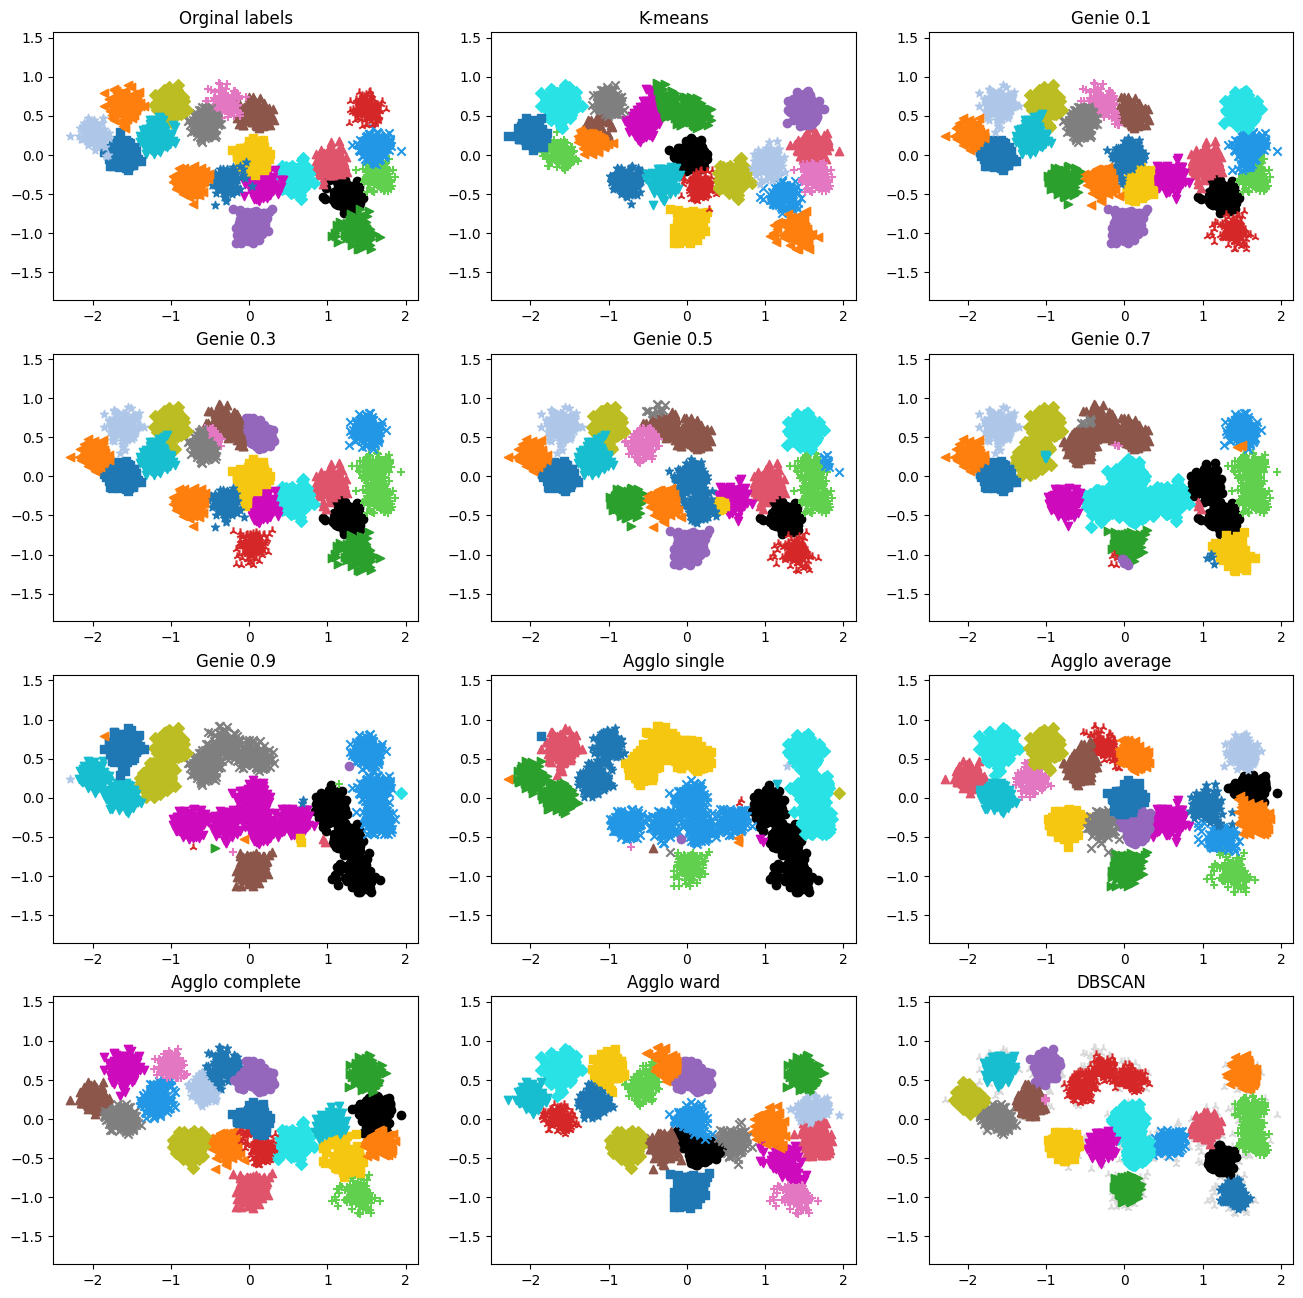

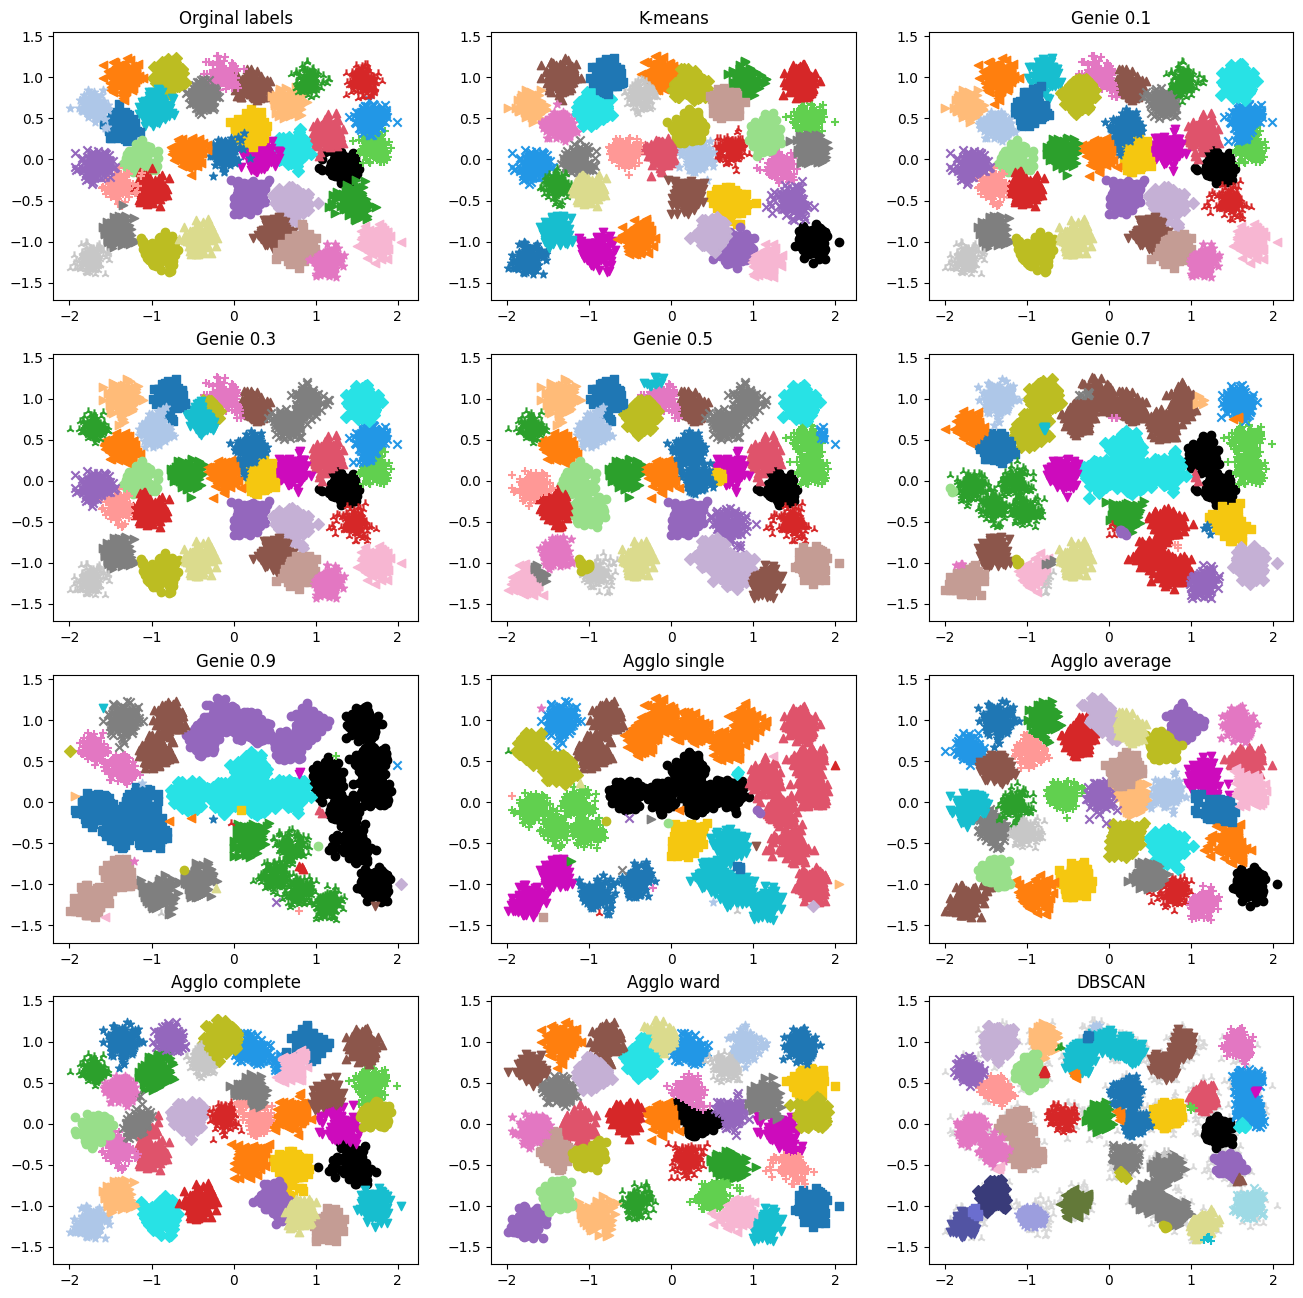

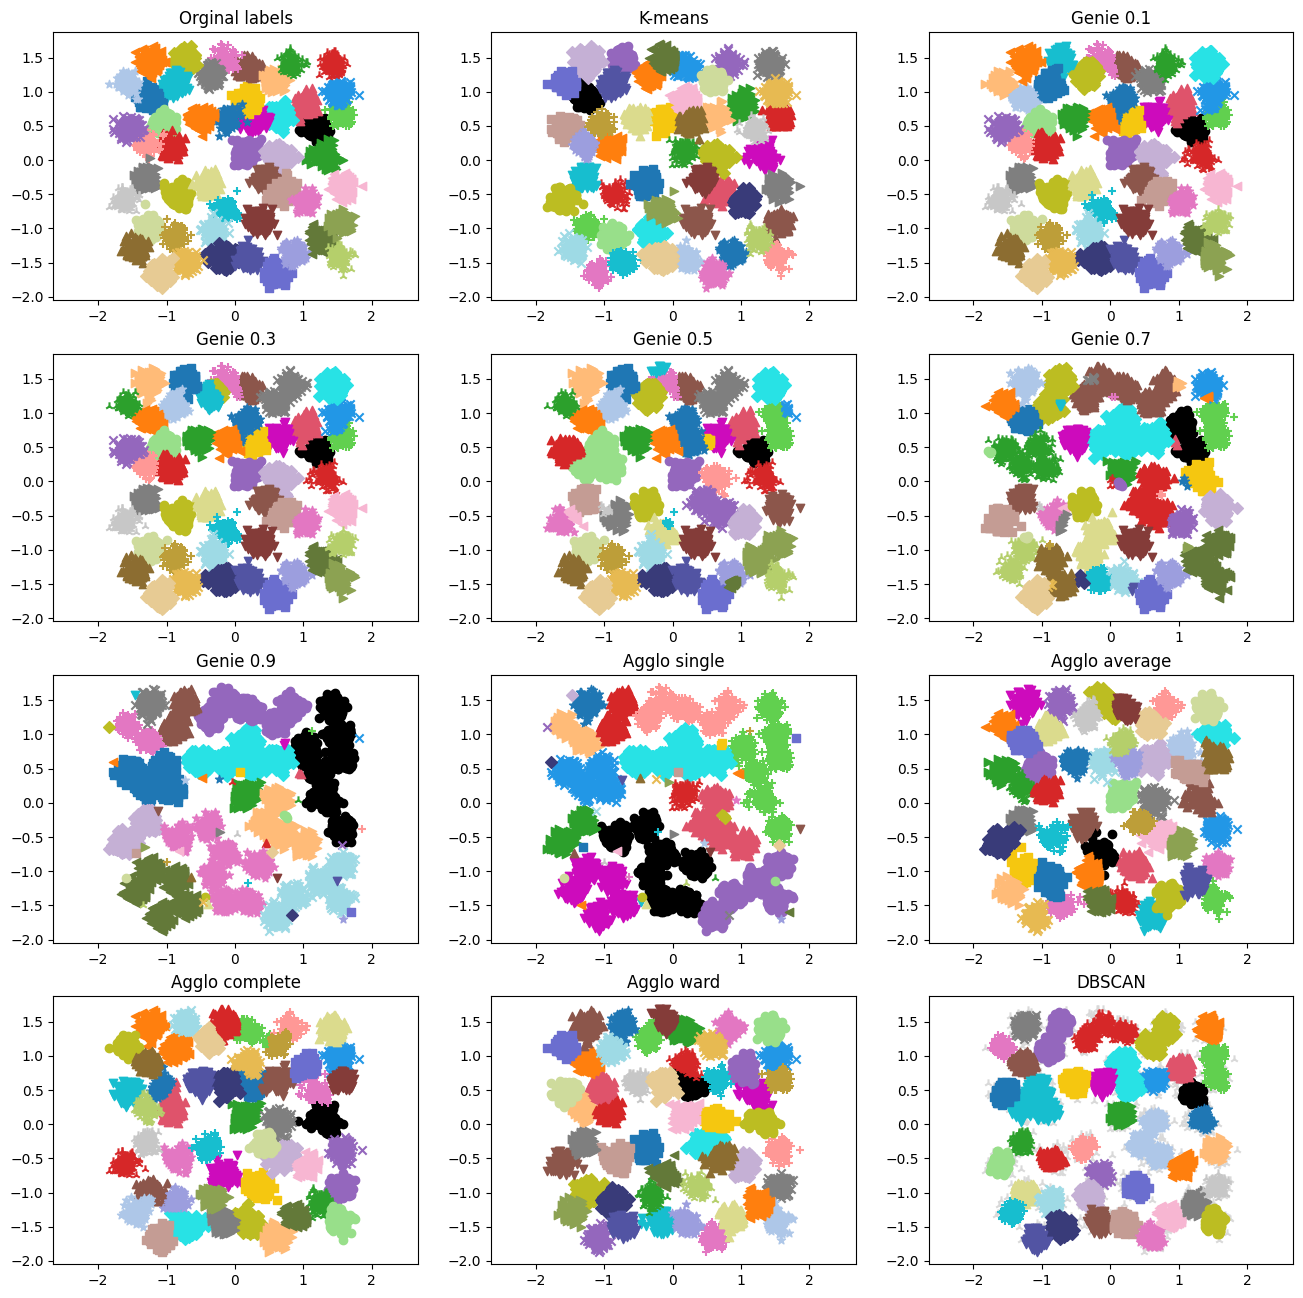

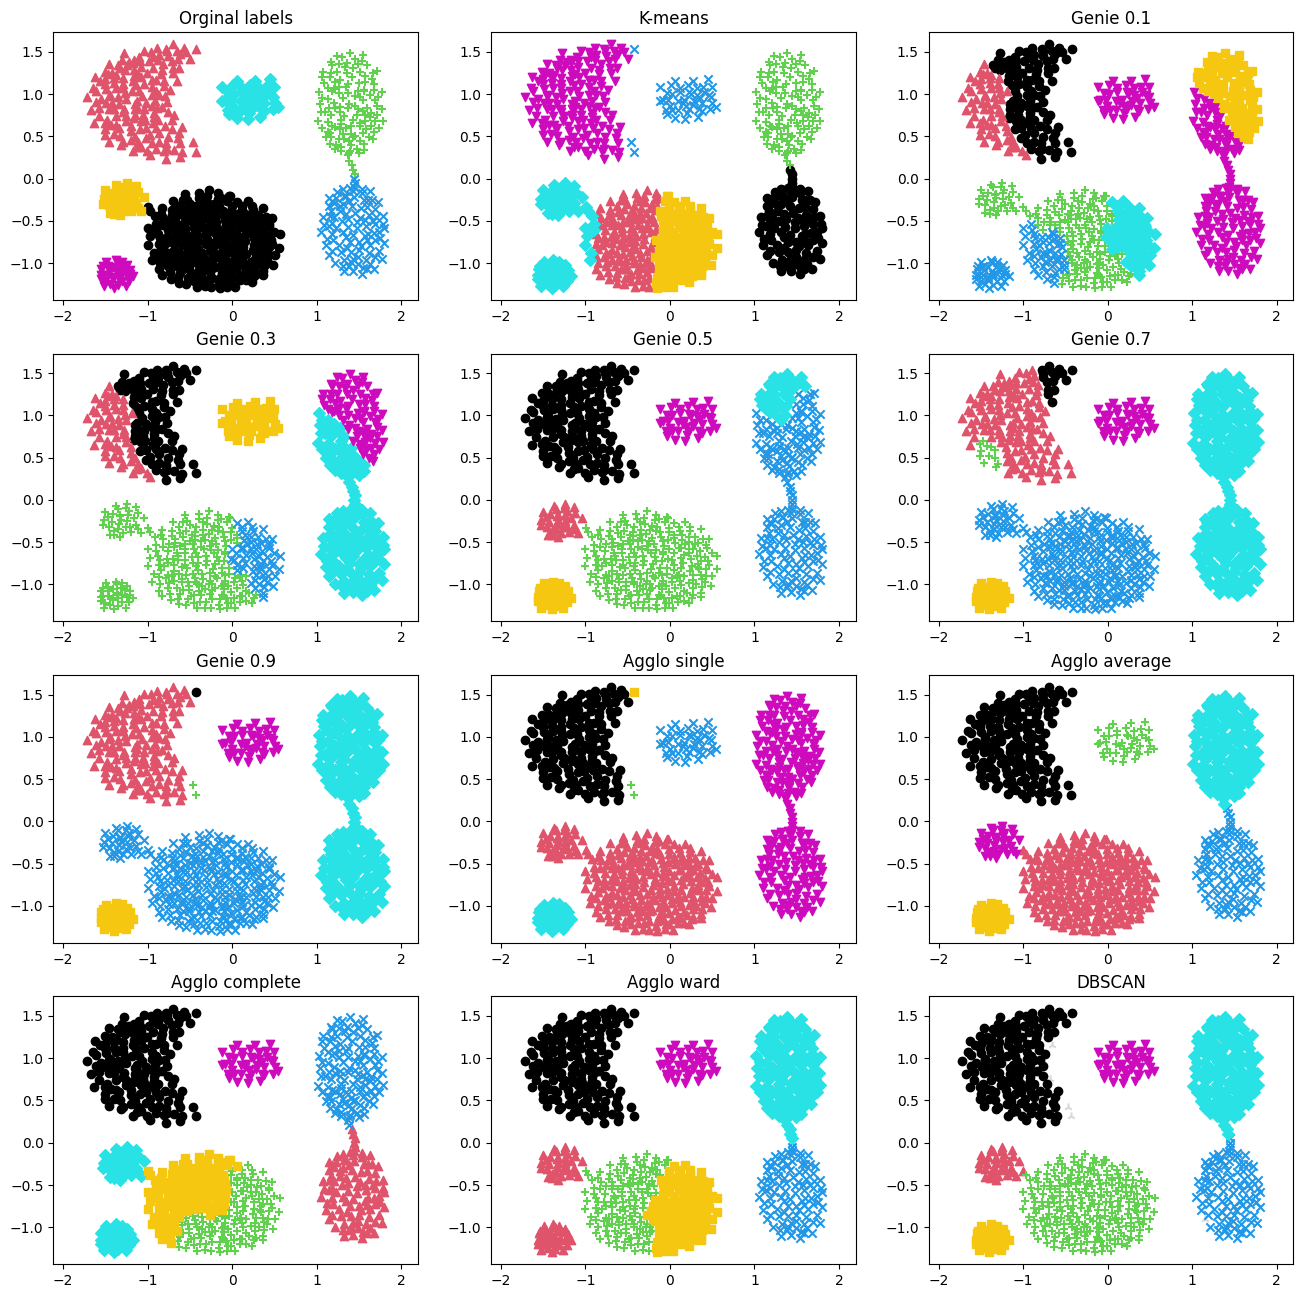

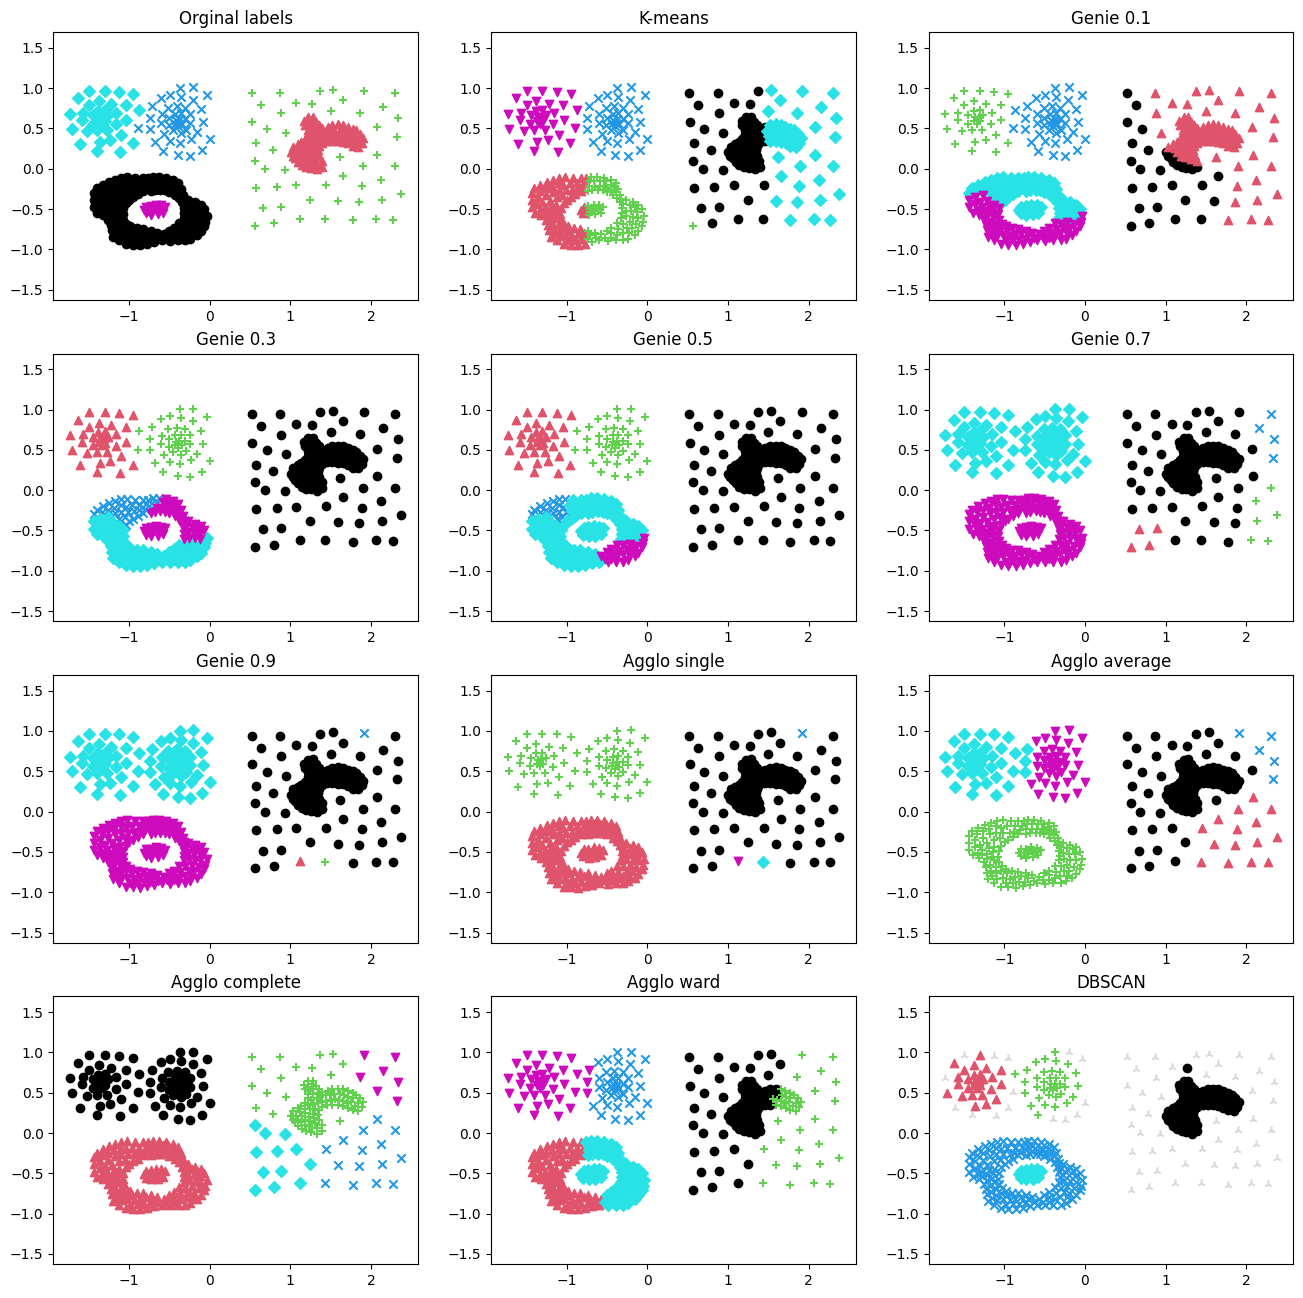

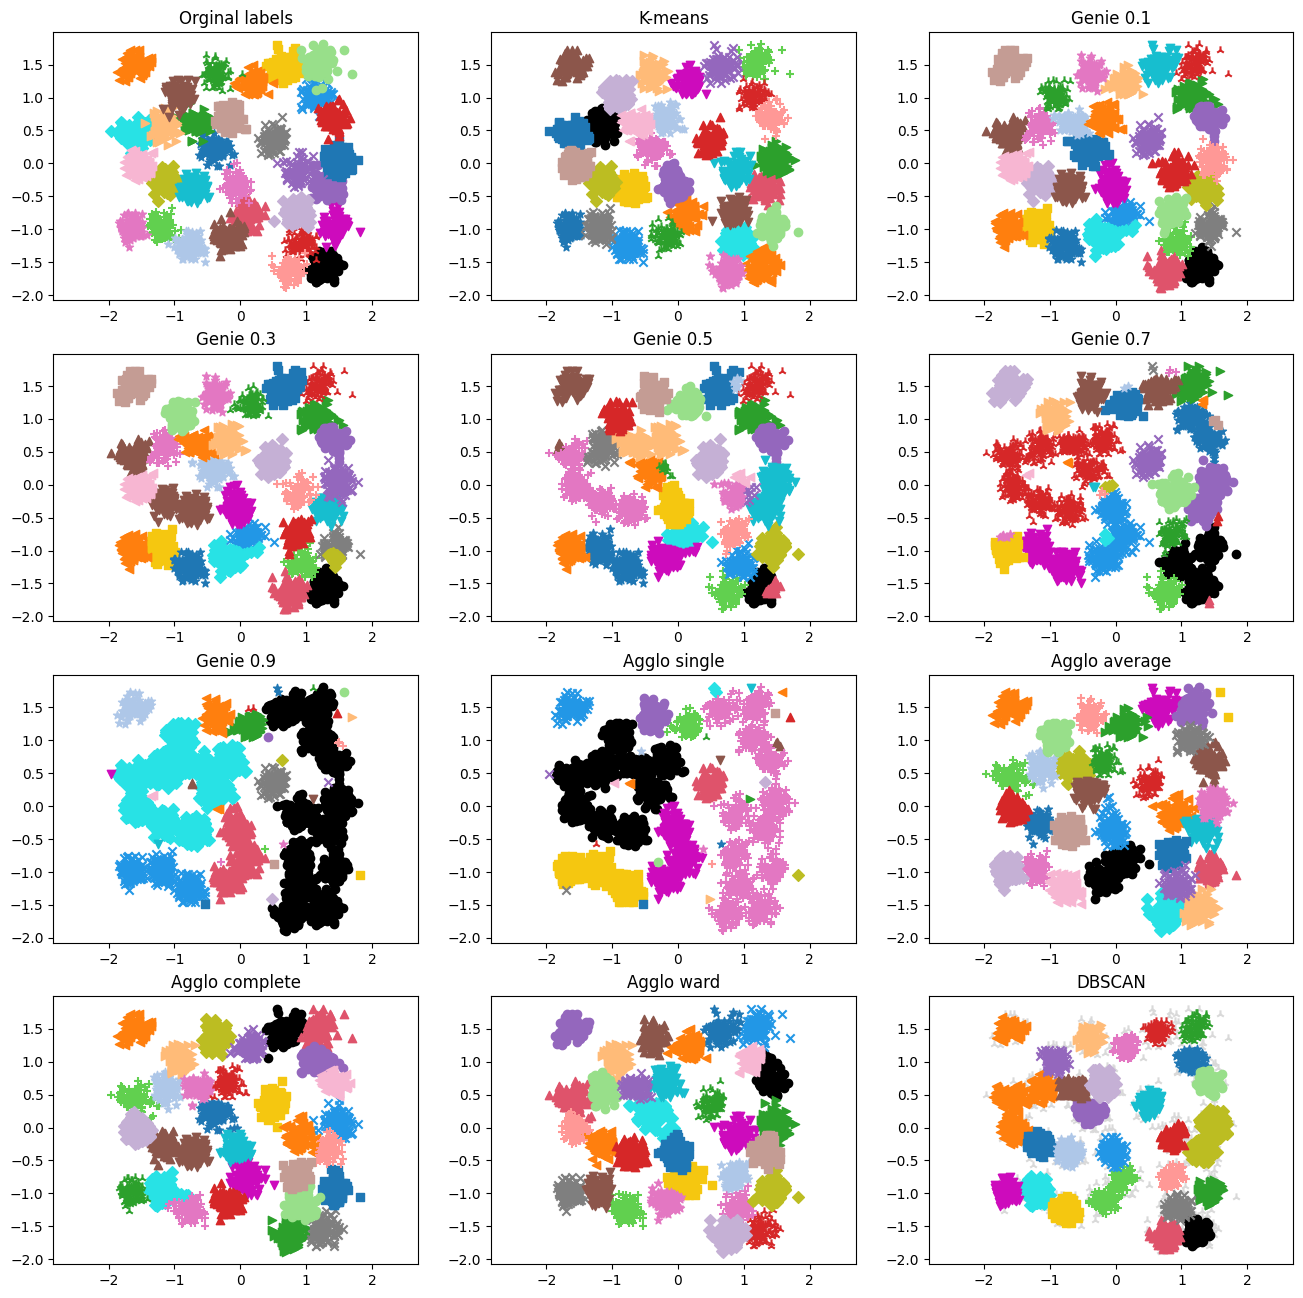

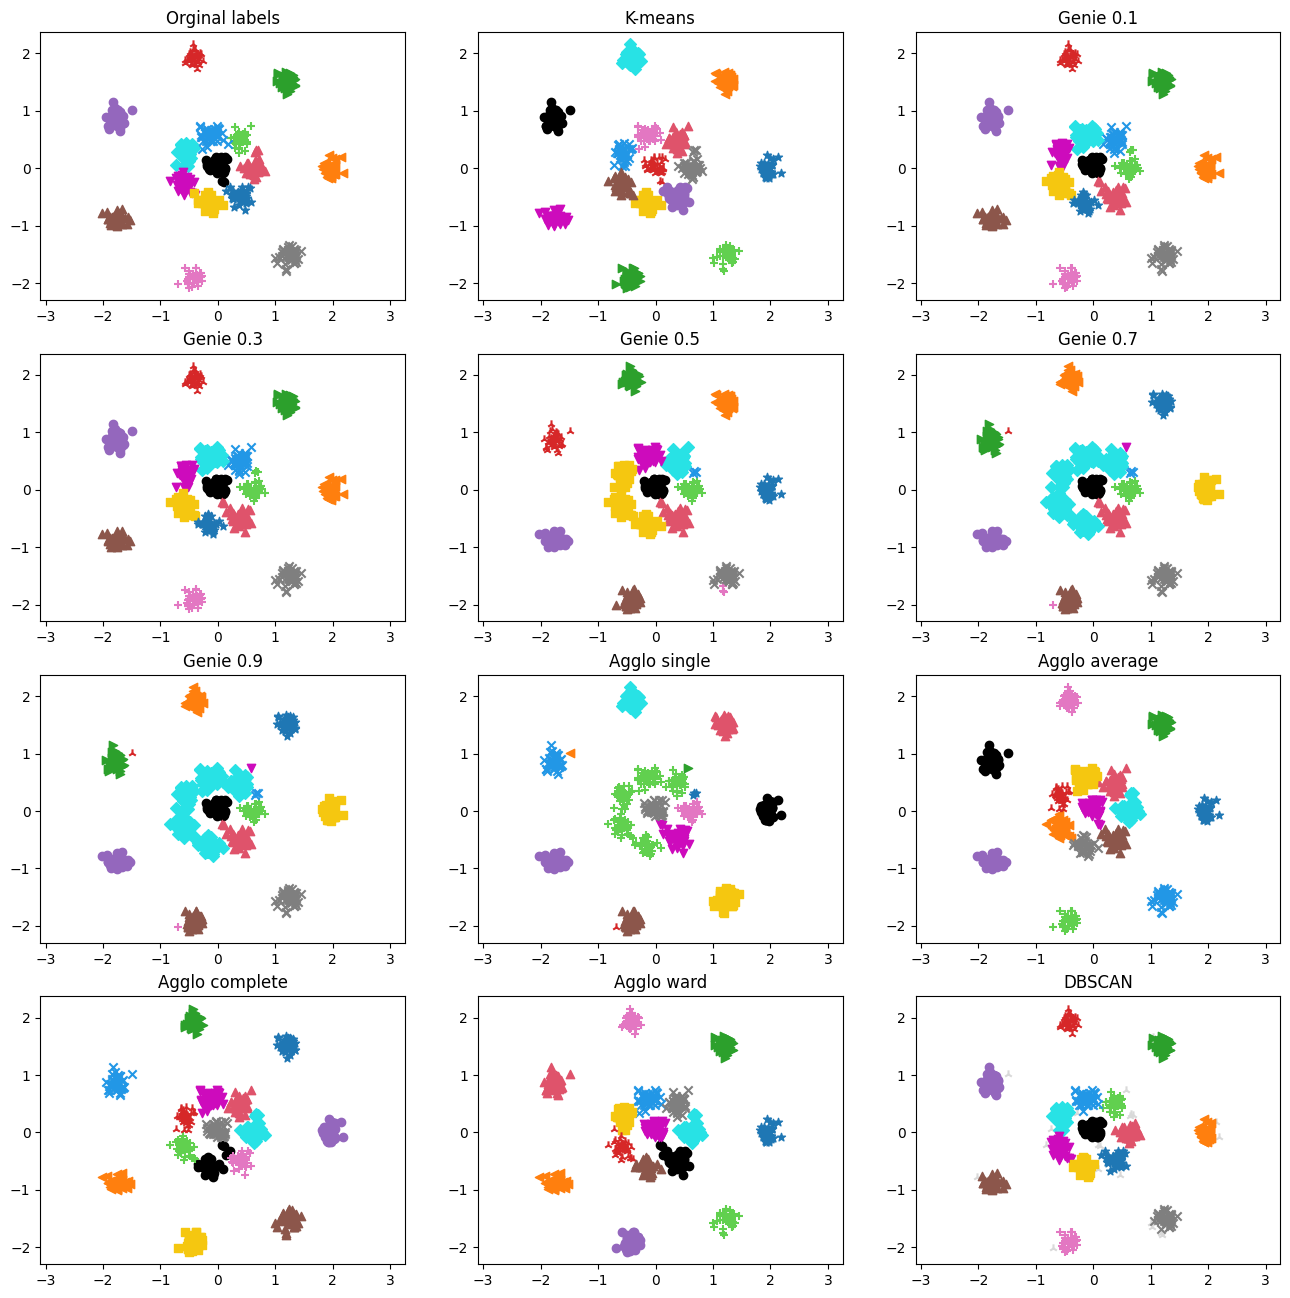

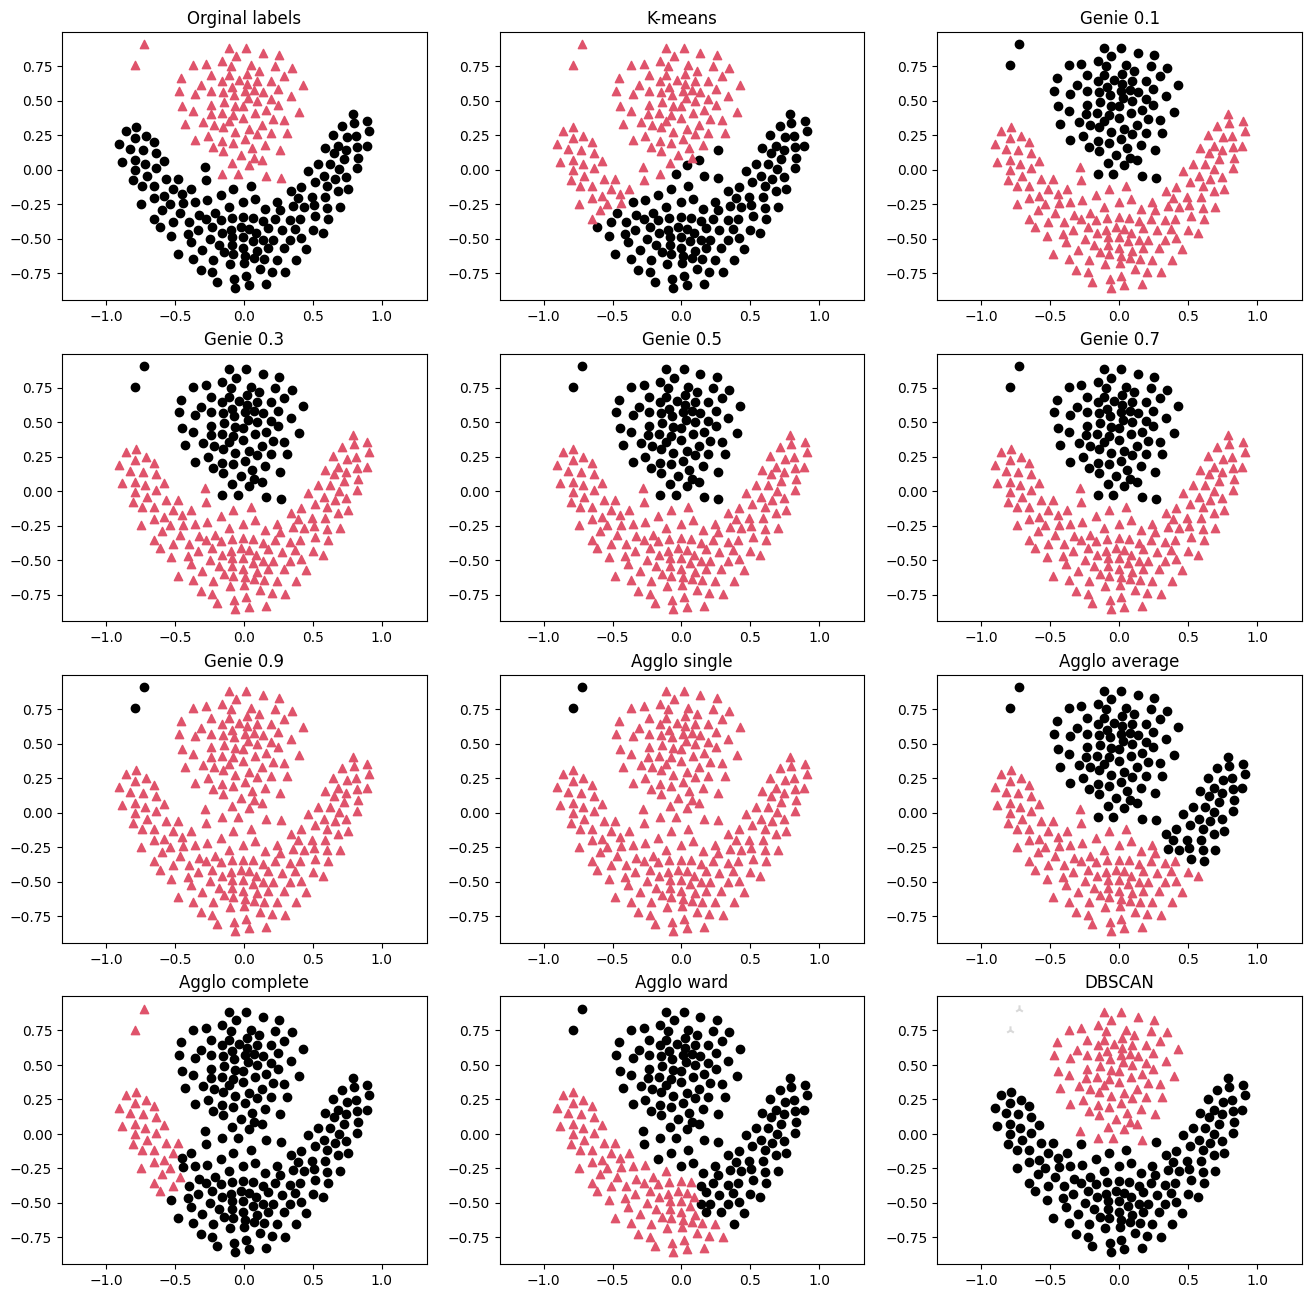

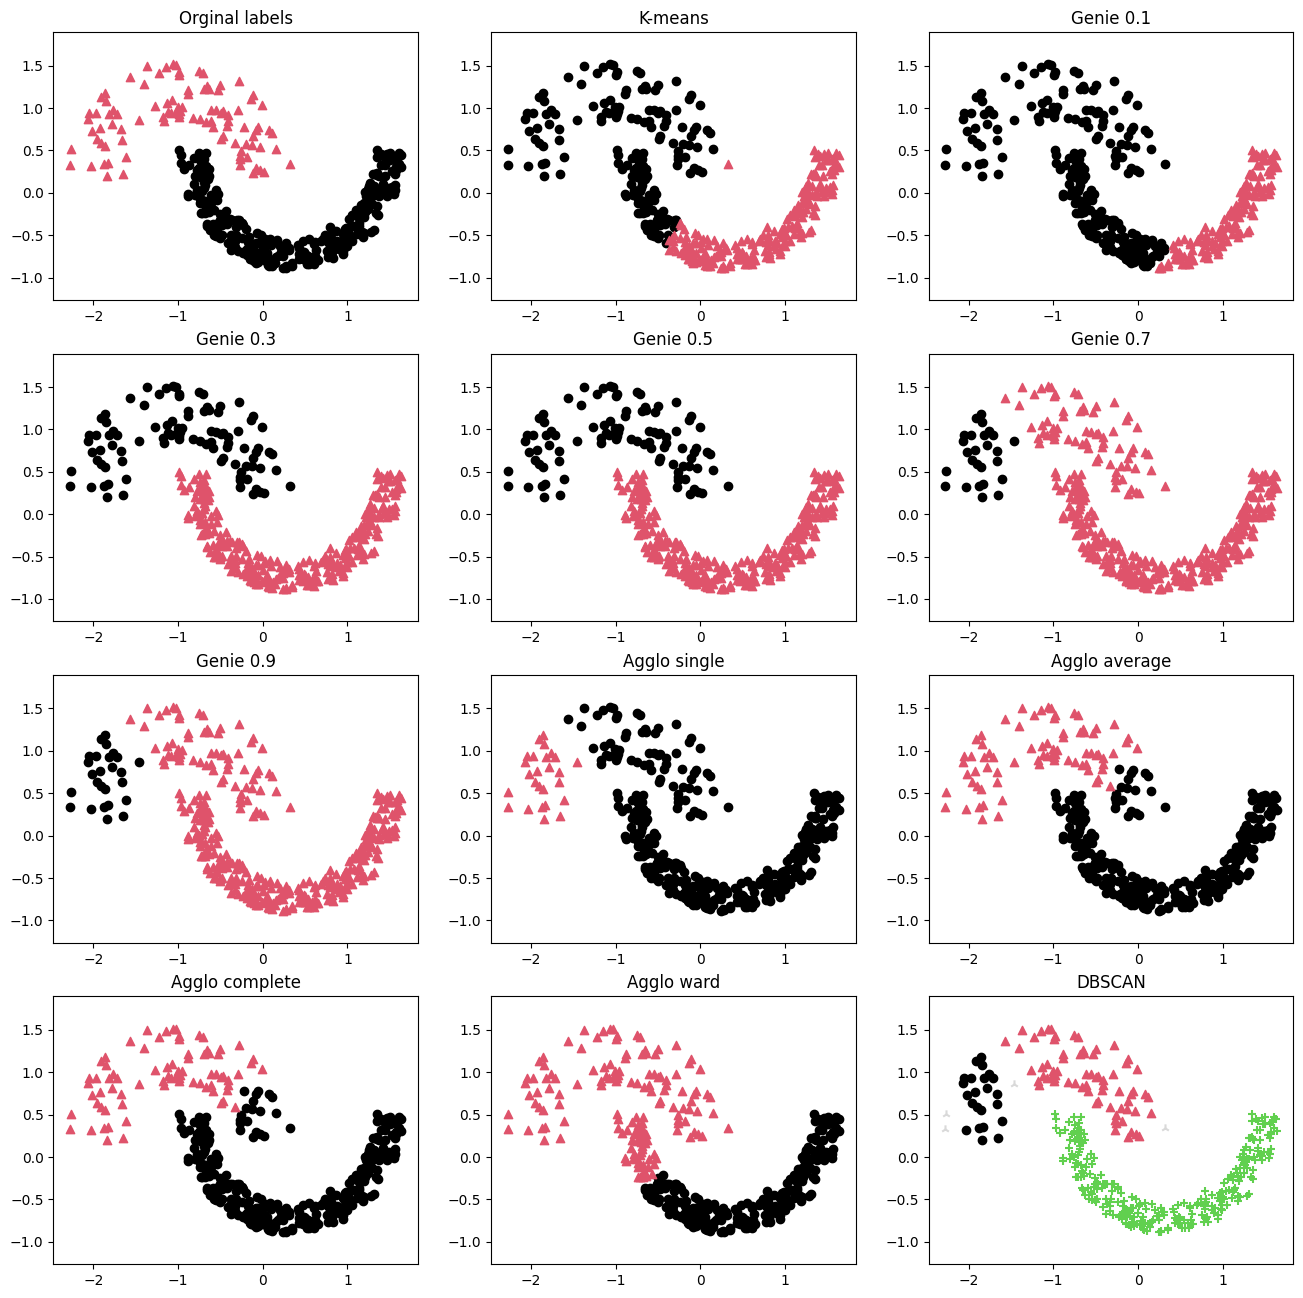

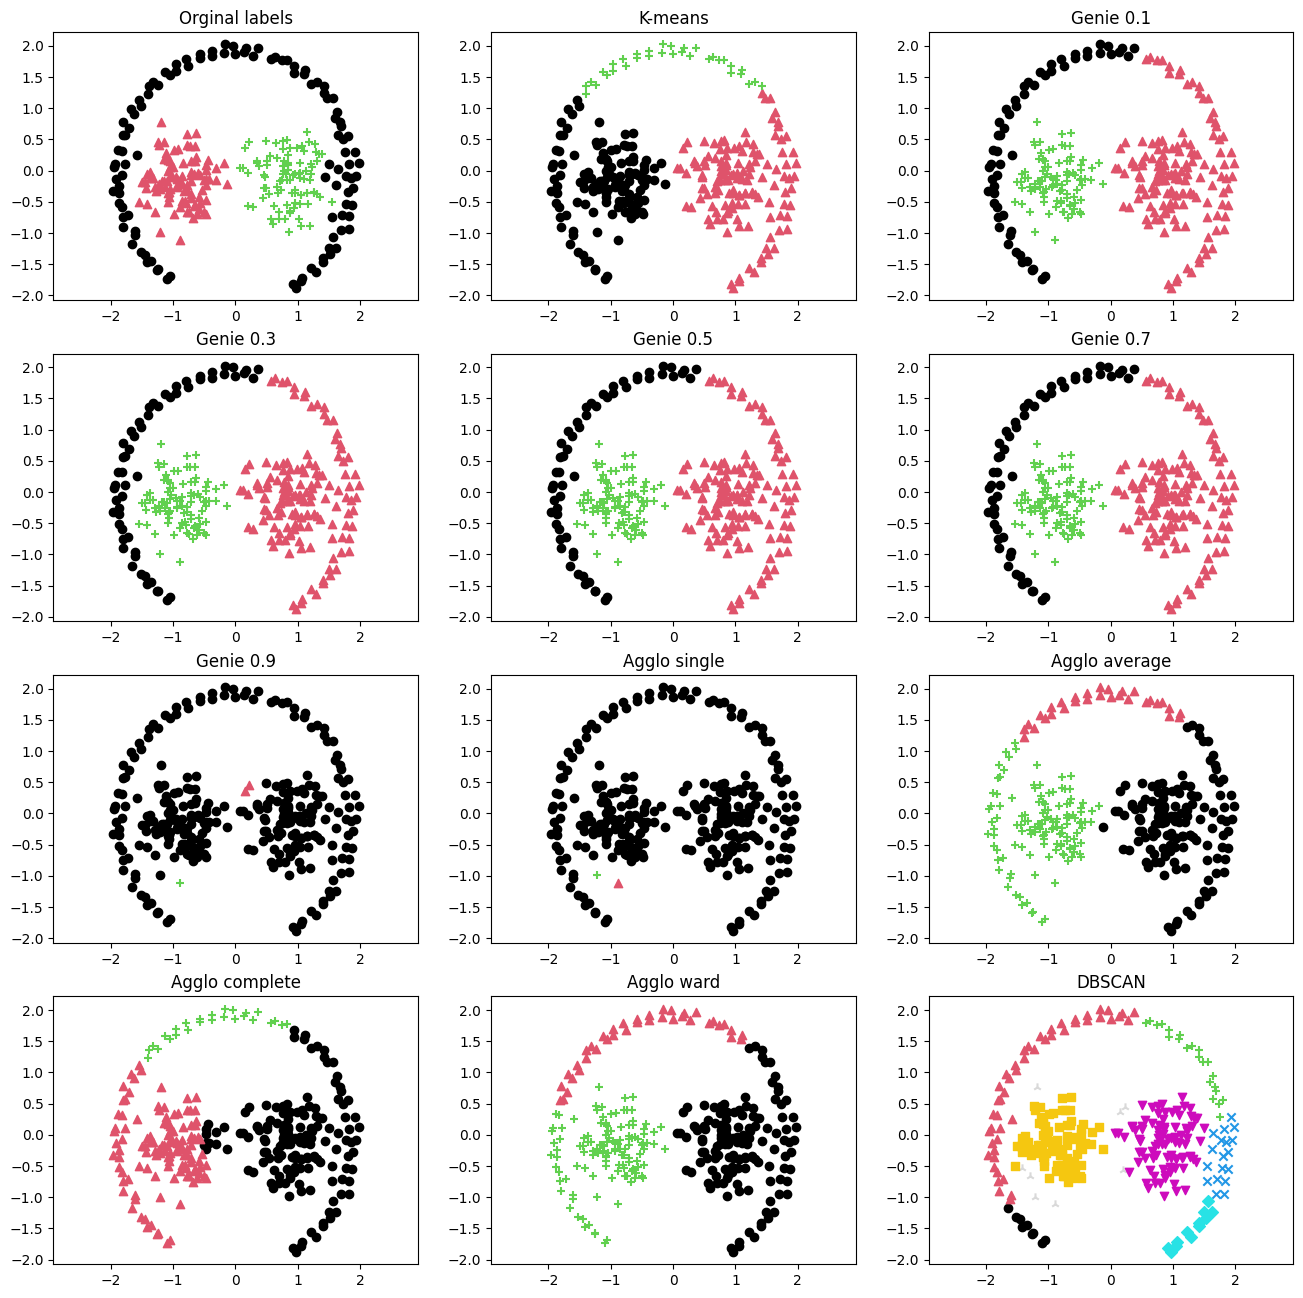

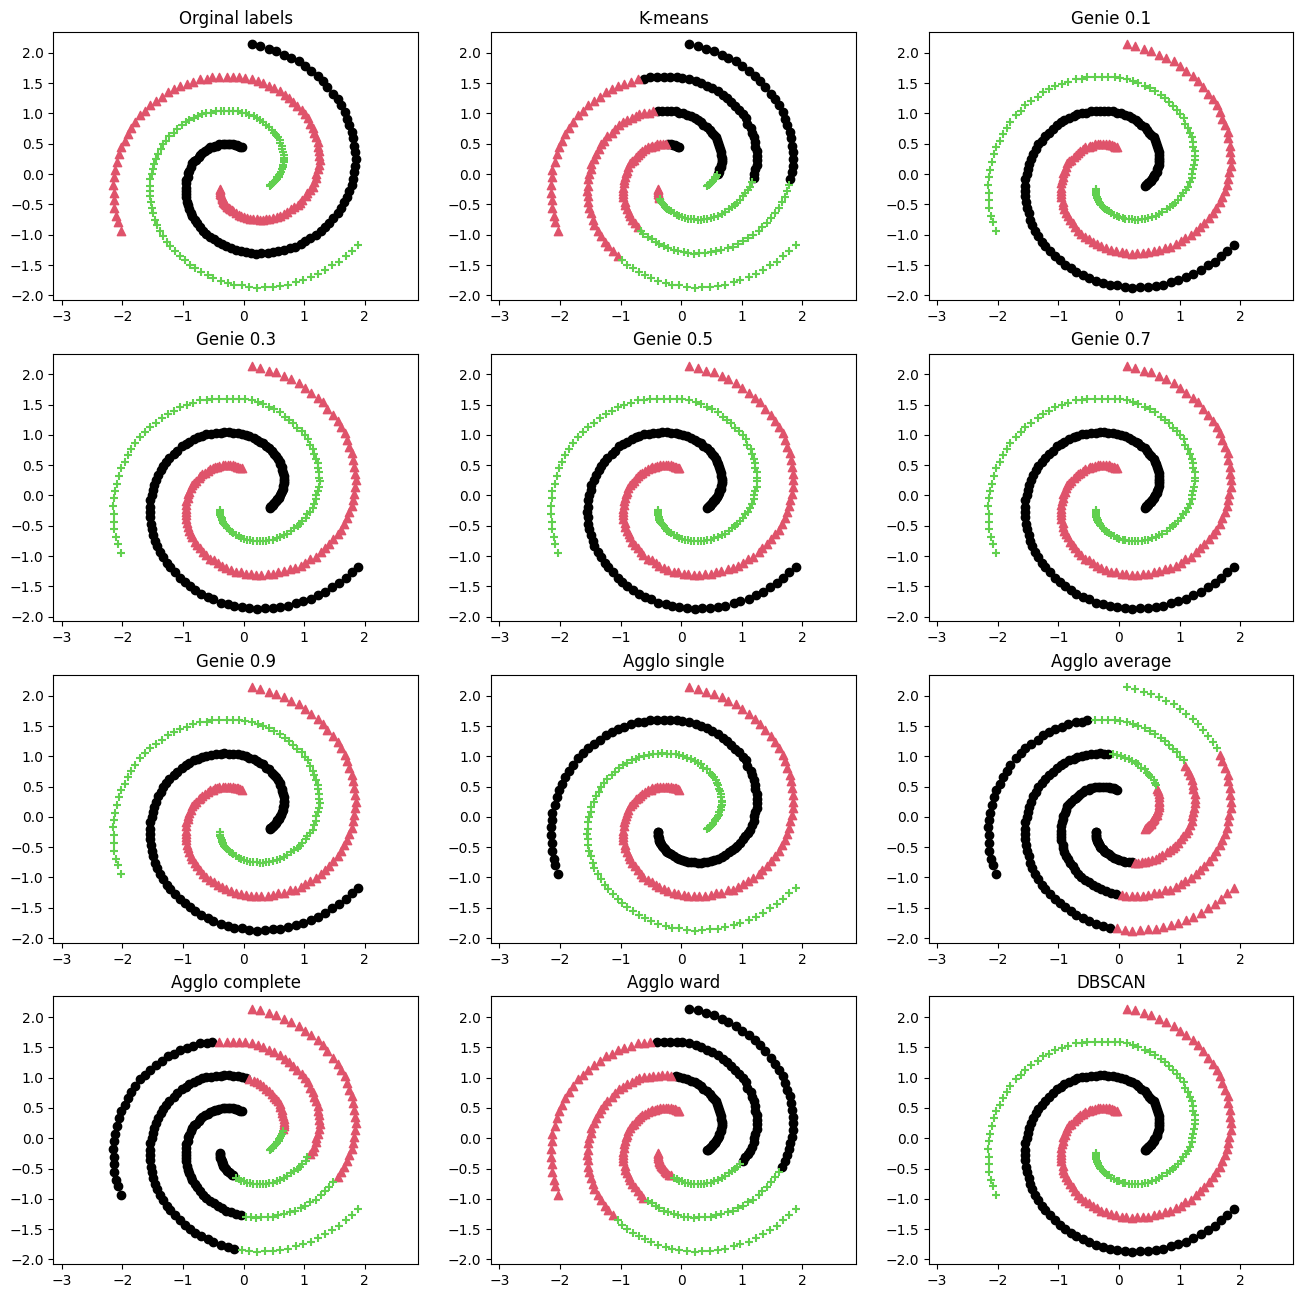

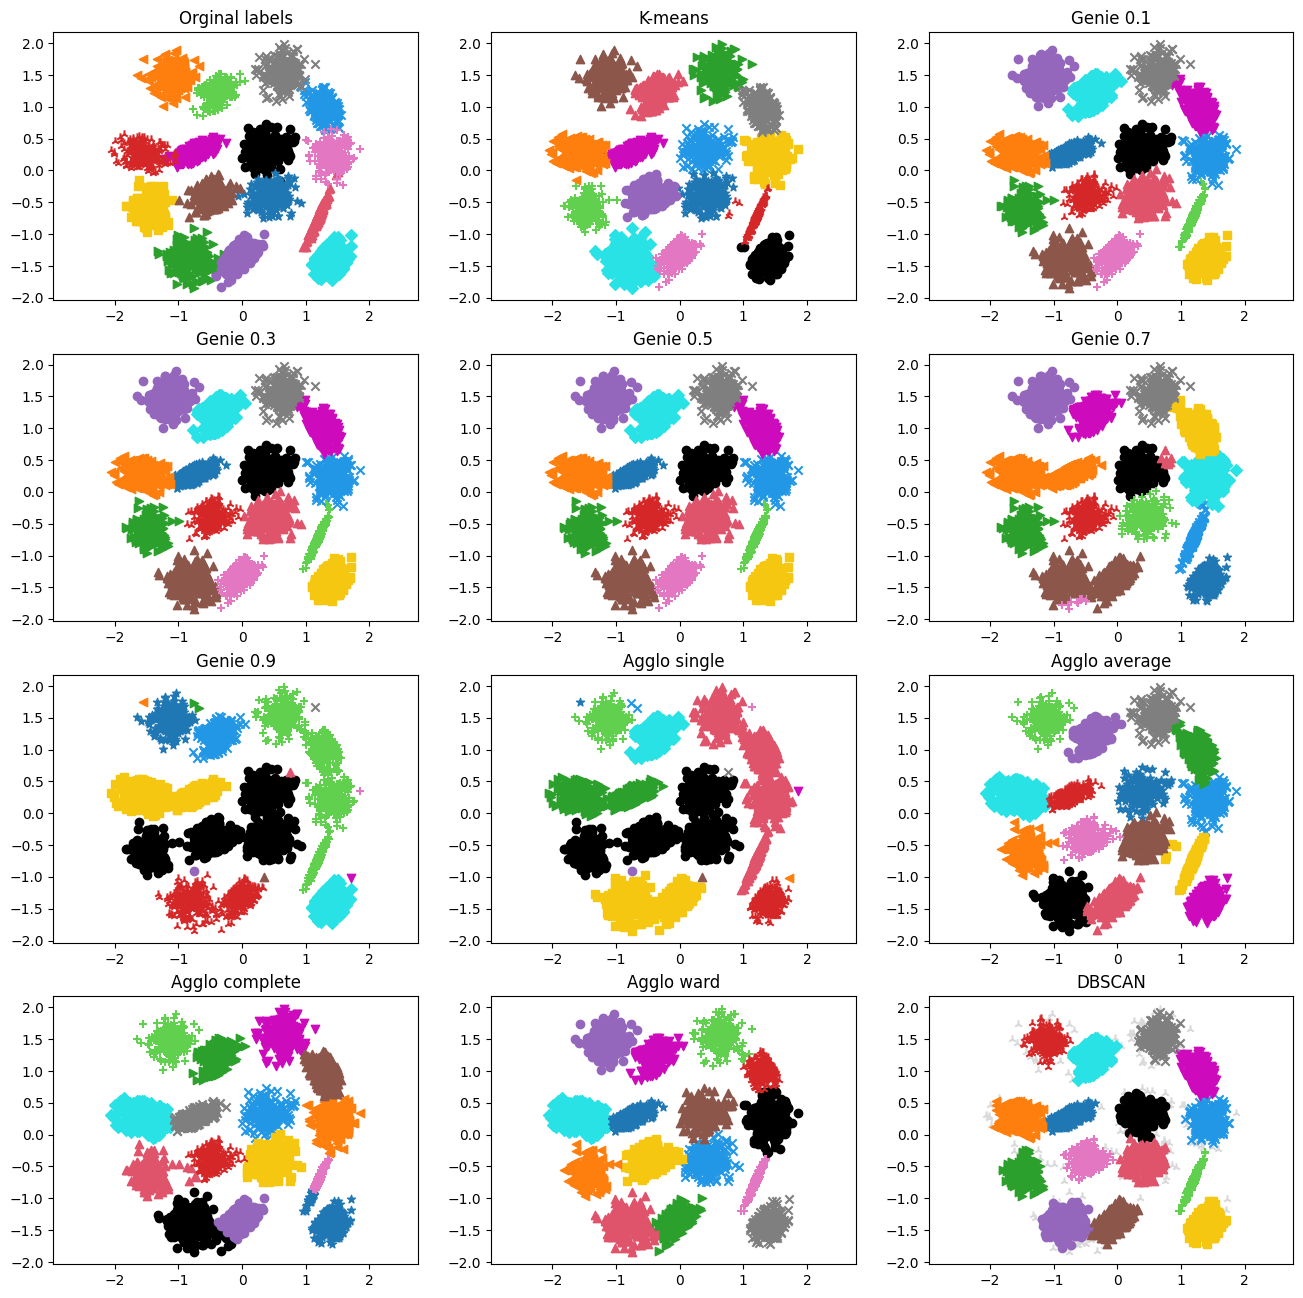

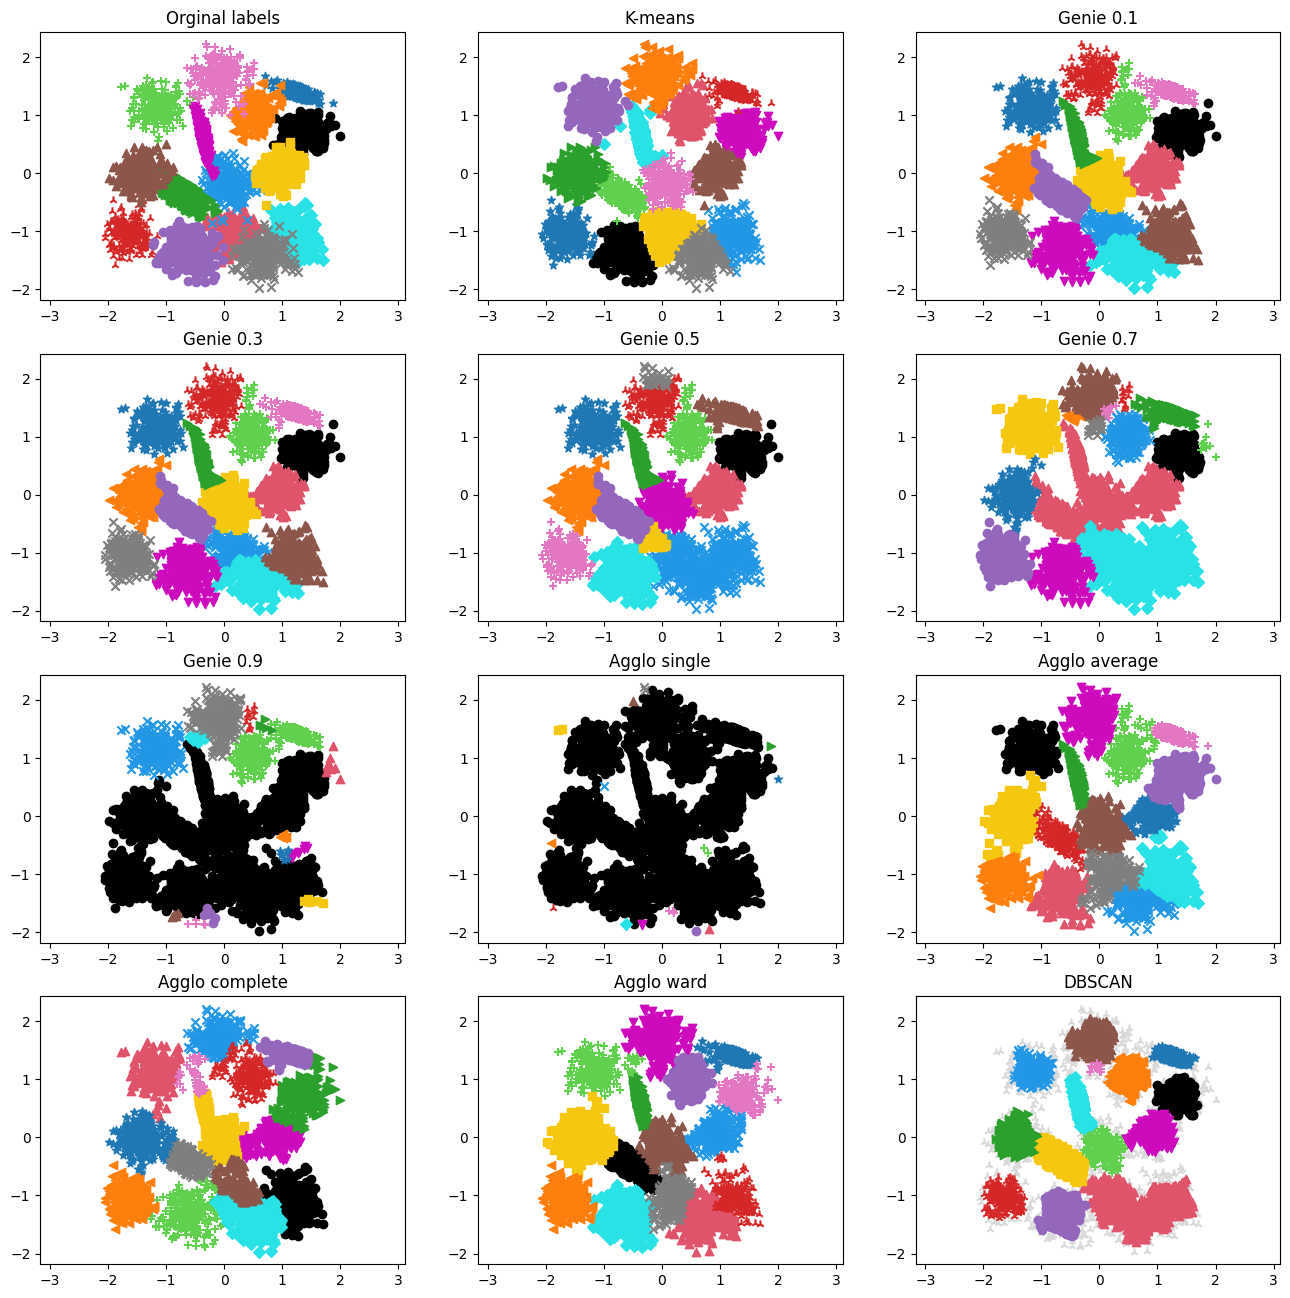

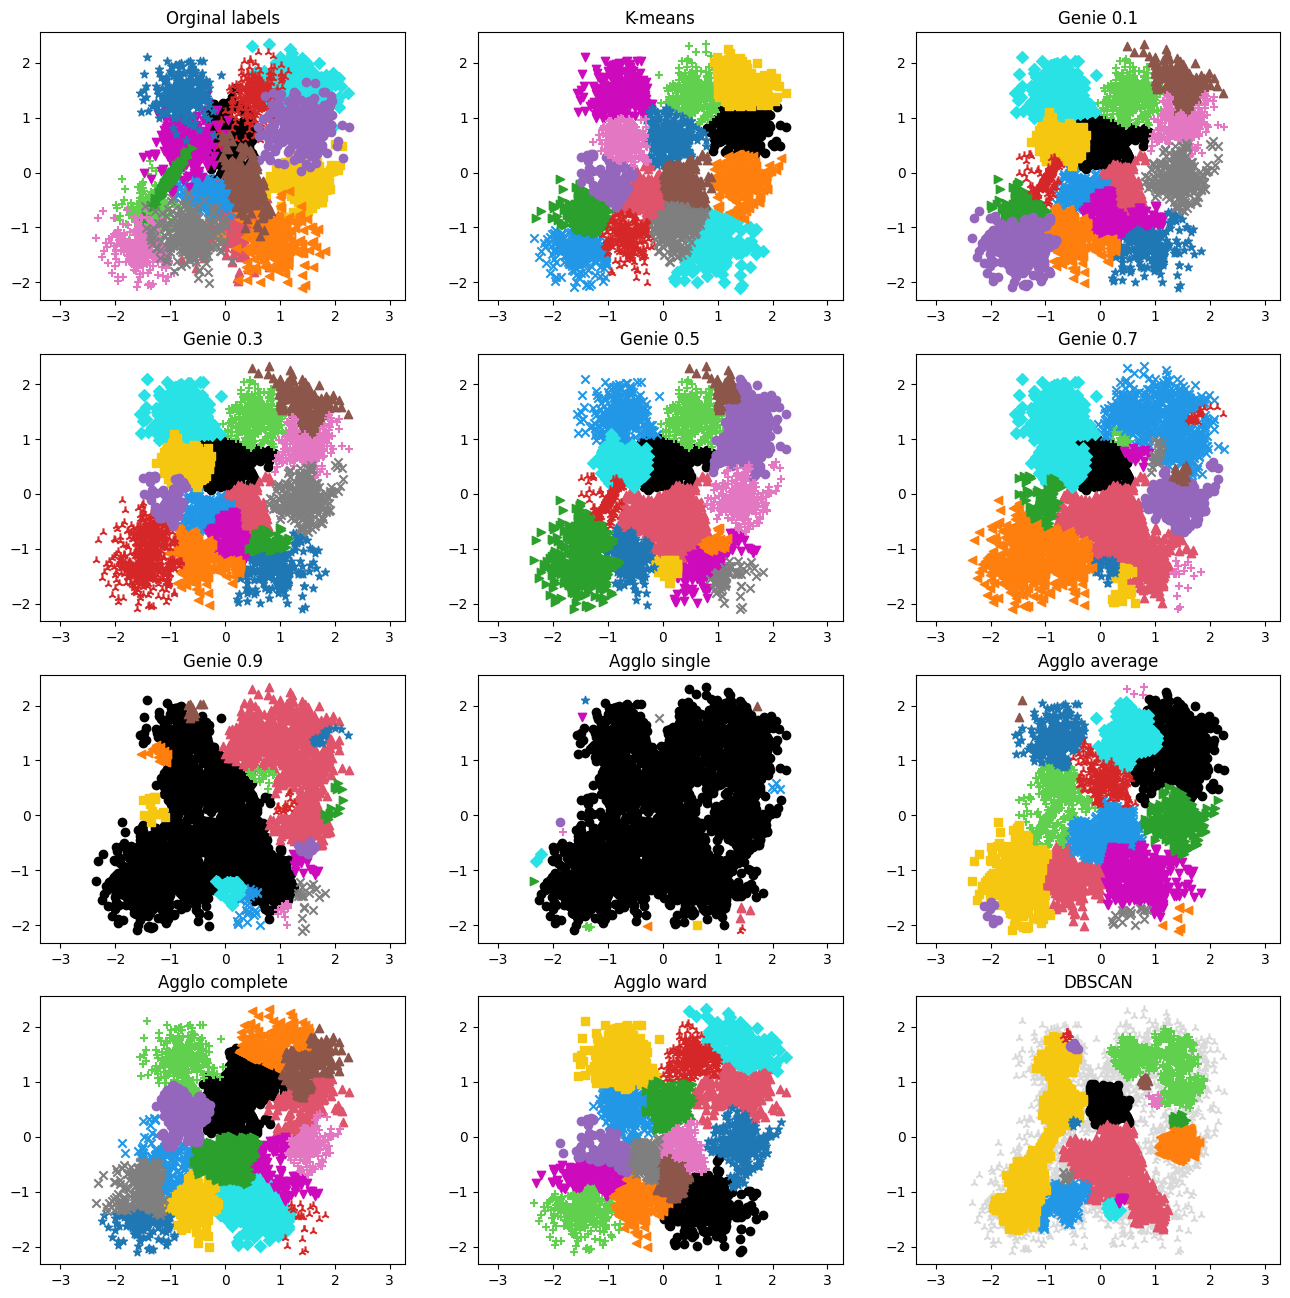

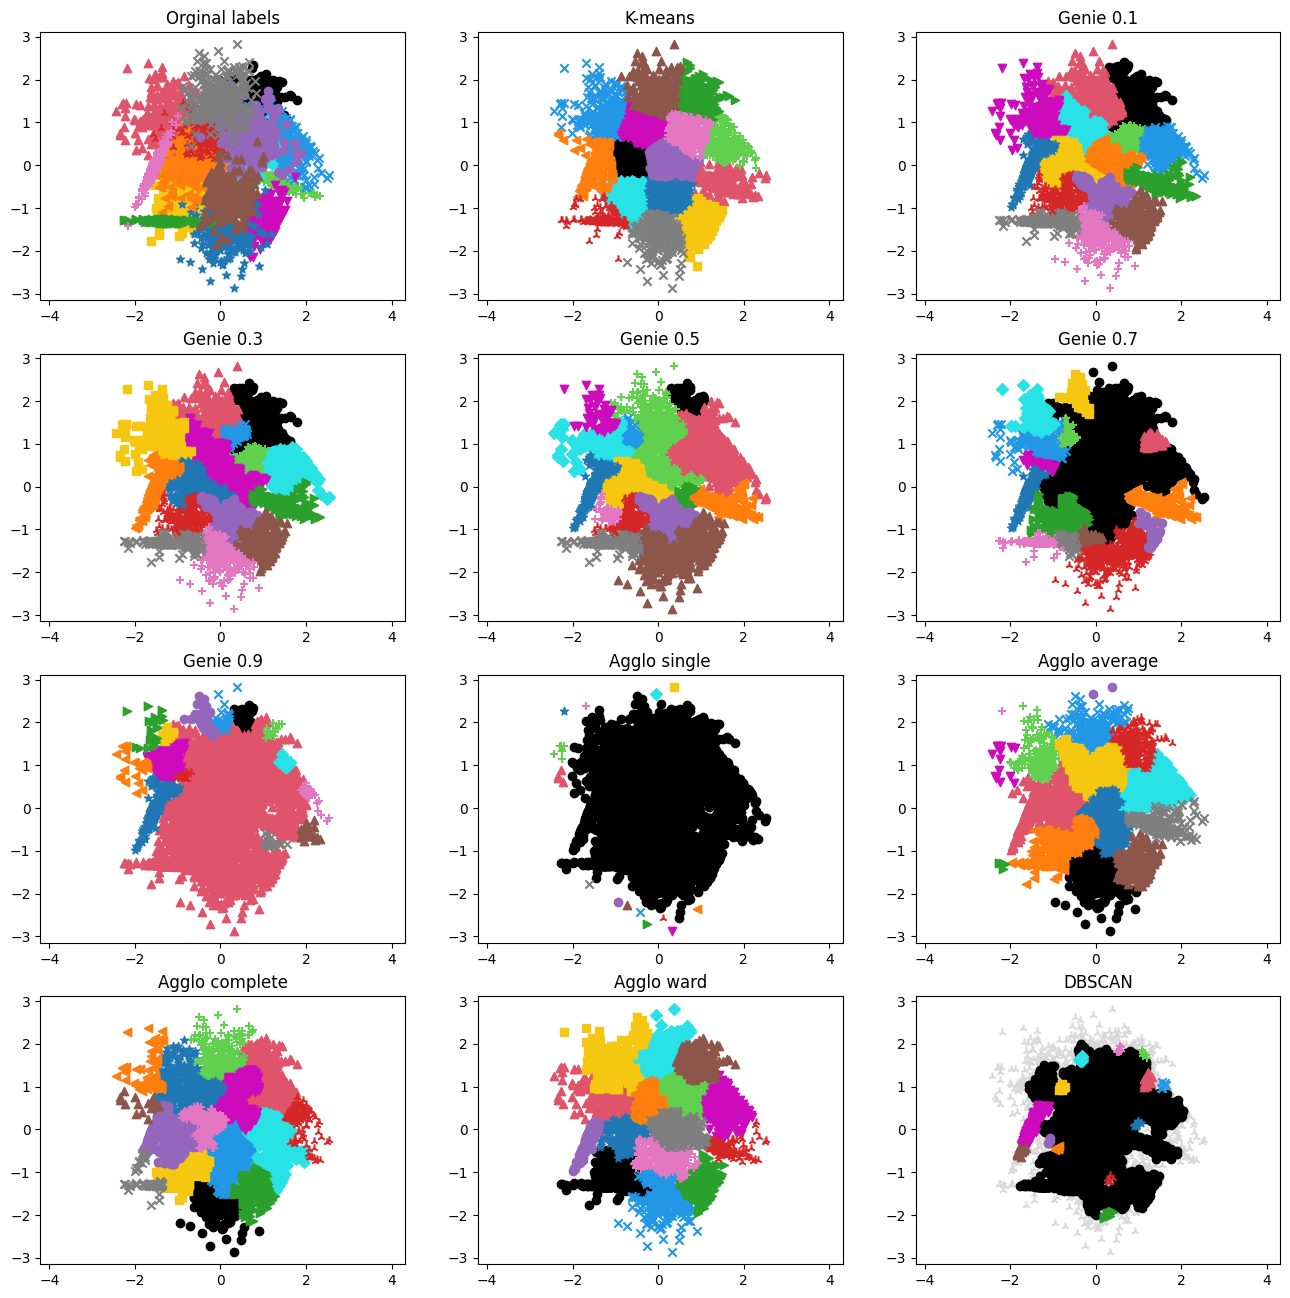

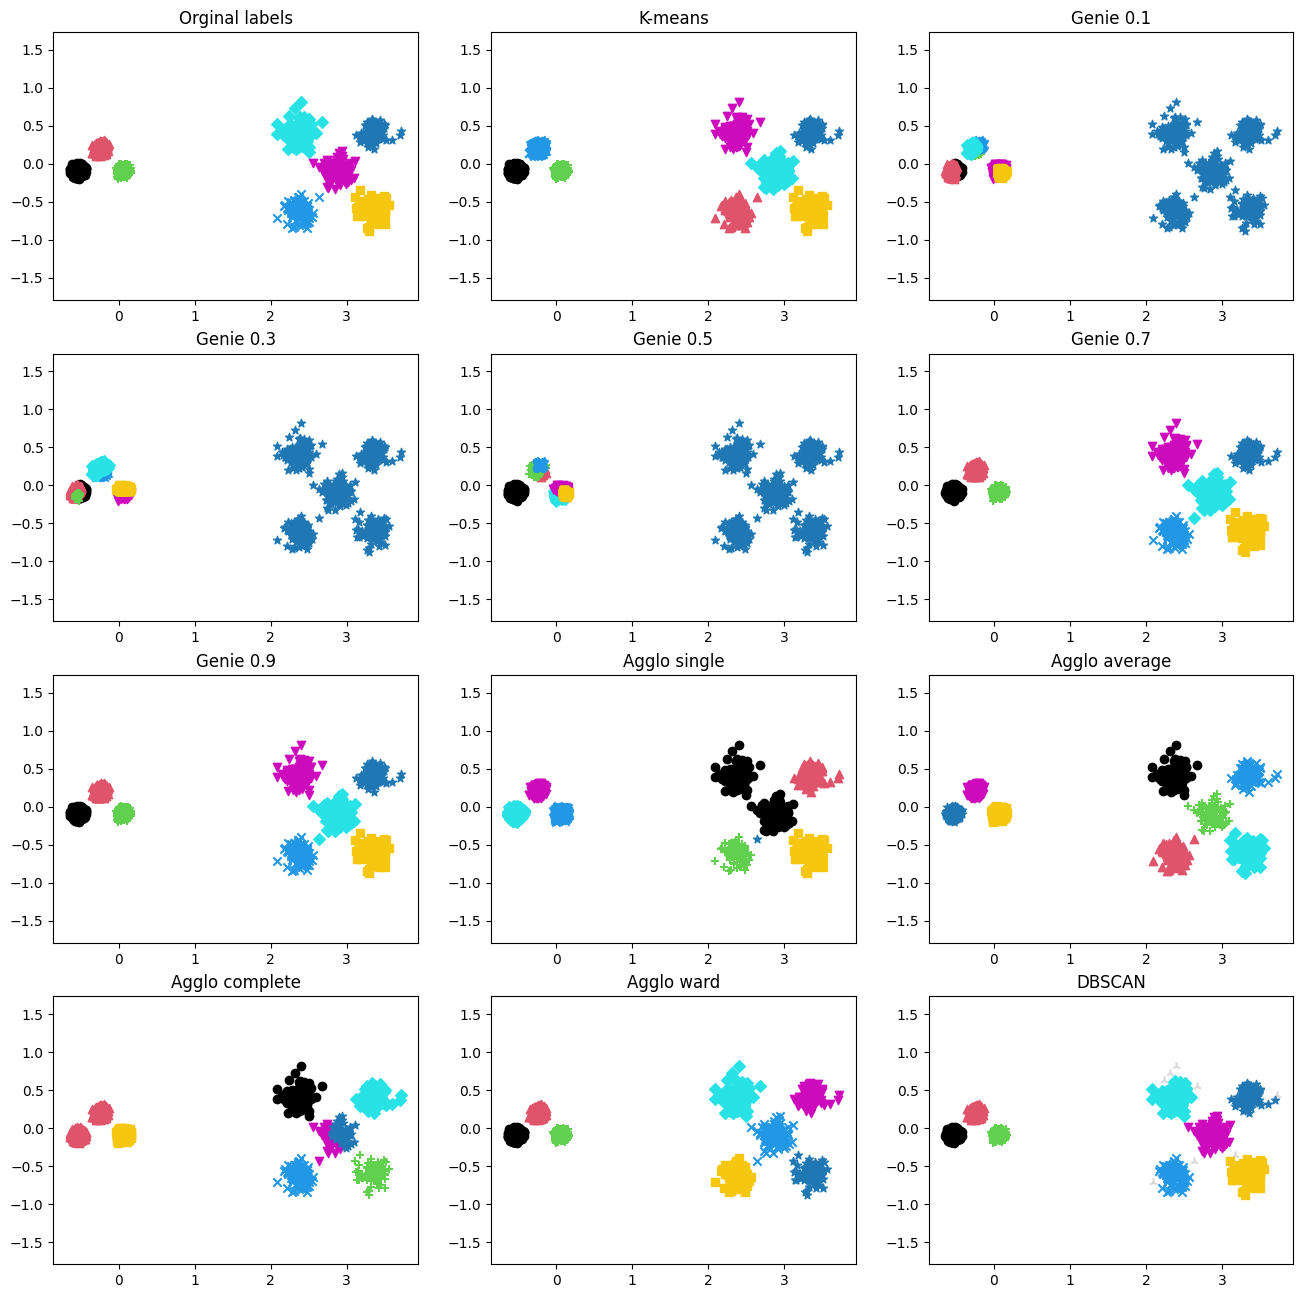

In [25]:
all_dataset_results = {}
all_dataset_res = {}
for sip in sipu_collection: 
    print("################")
    print("DATASET: ", sip)
    benchmark = clustbench.load_dataset("sipu", sip, path="./github.com/gagolews/clustering-data-v1/raw/v1.1.0")
    res, scores = fit_evaluate(benchmark, models)
    plot_results(benchmark, res)
    all_dataset_results[sip] = scores
    all_dataset_res[sip] = res


# plot scores

In [26]:
def plot_scores(scores):
    labels = list(scores.keys())
    values = list(scores.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

    plt.xlabel('Method')
    plt.ylabel('Score')
    plt.title(f'Adjusted rand score for {sip} dataset')
    plt.ylim(0, 1.1)

    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.savefig(f"{sip}_plt_bar.png")
    plt.show()

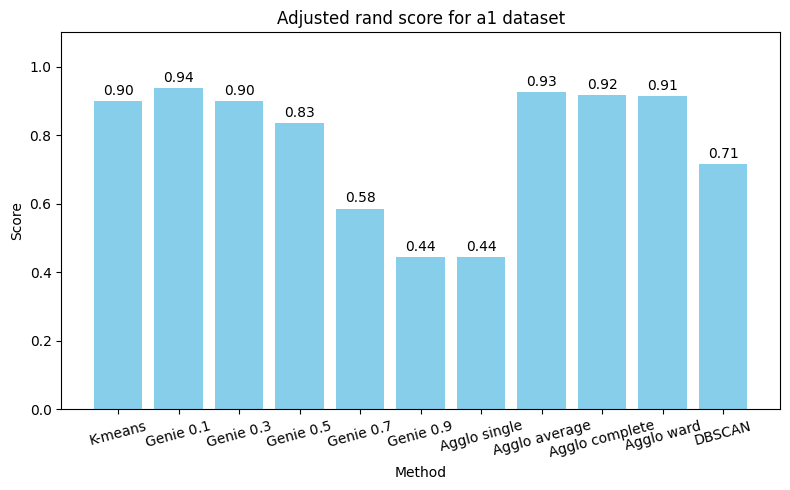

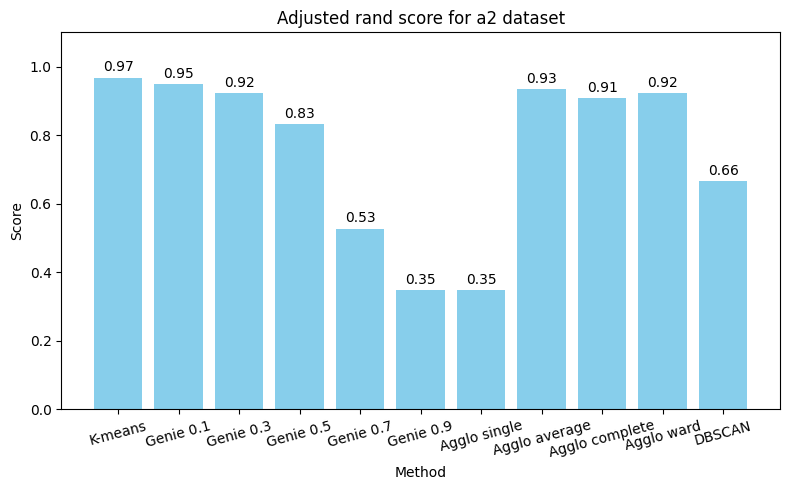

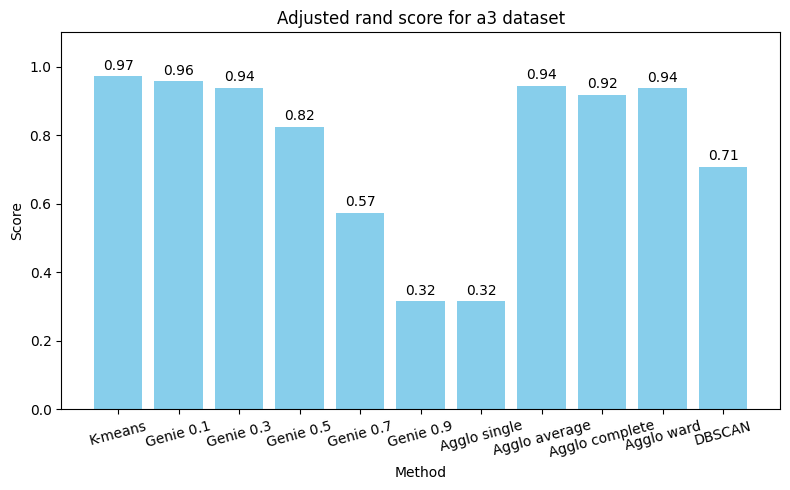

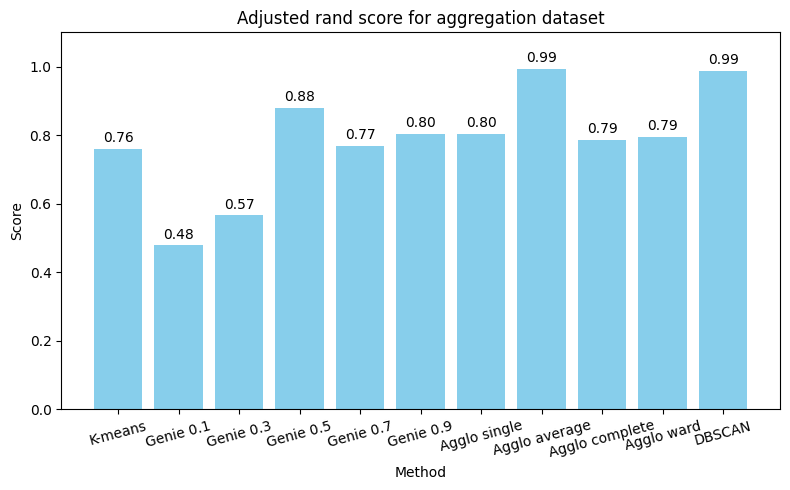

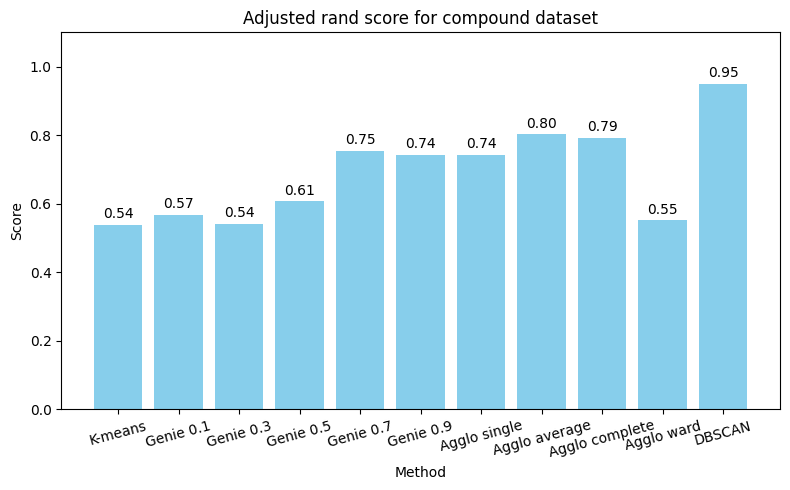

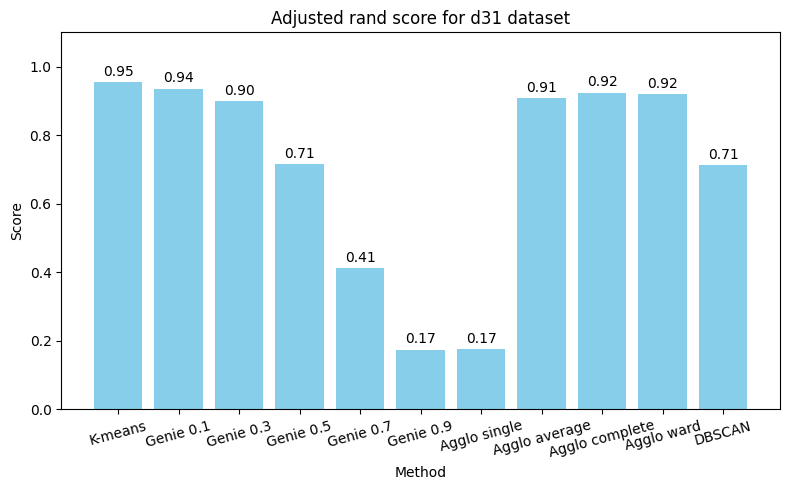

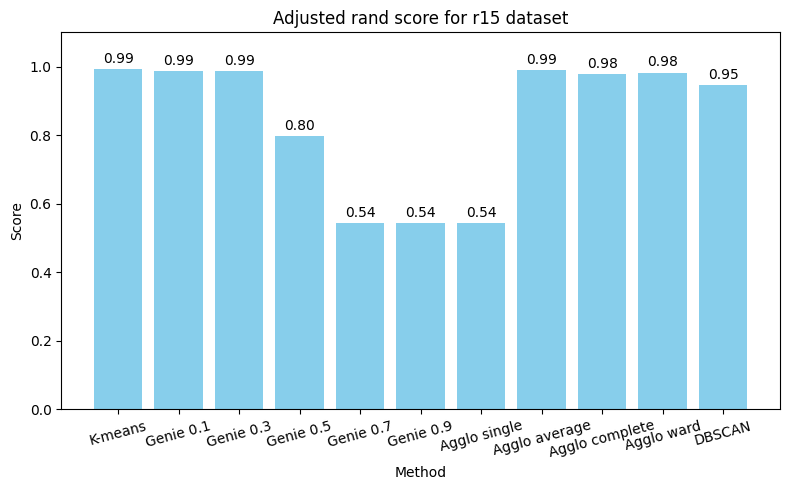

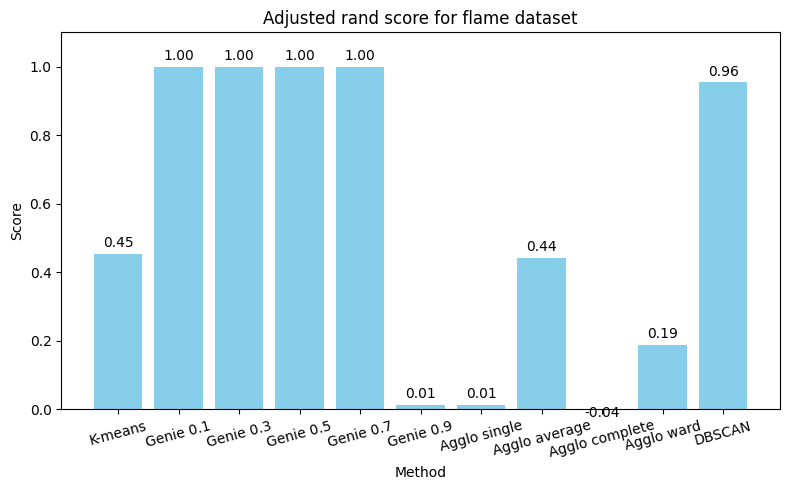

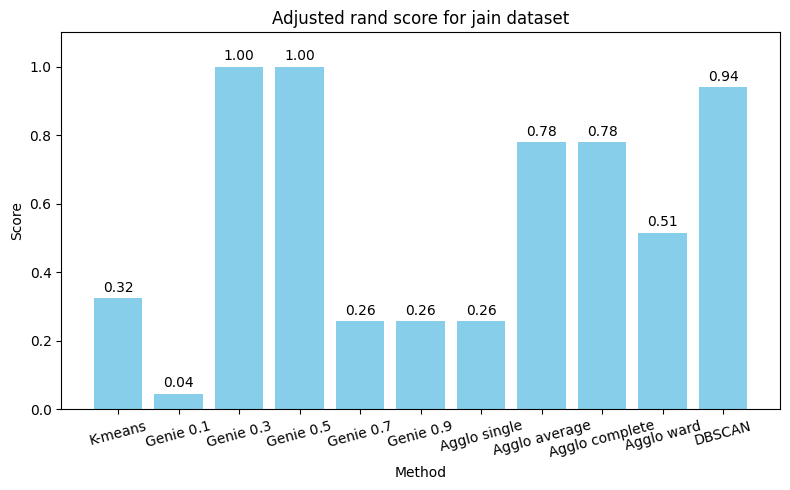

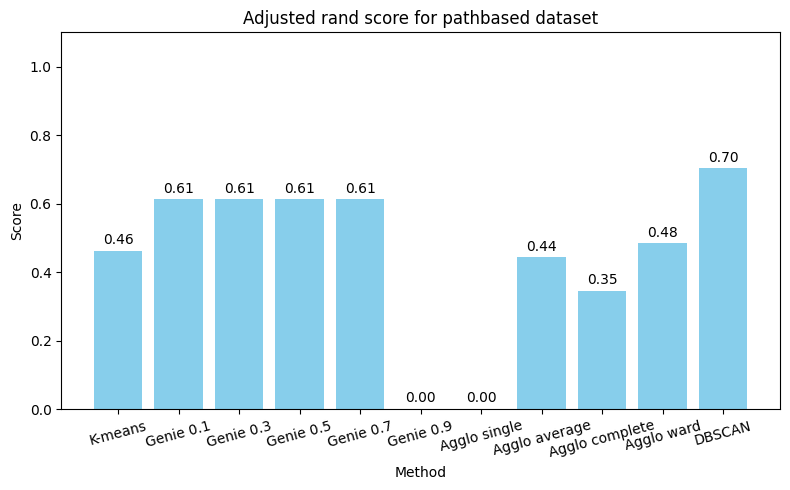

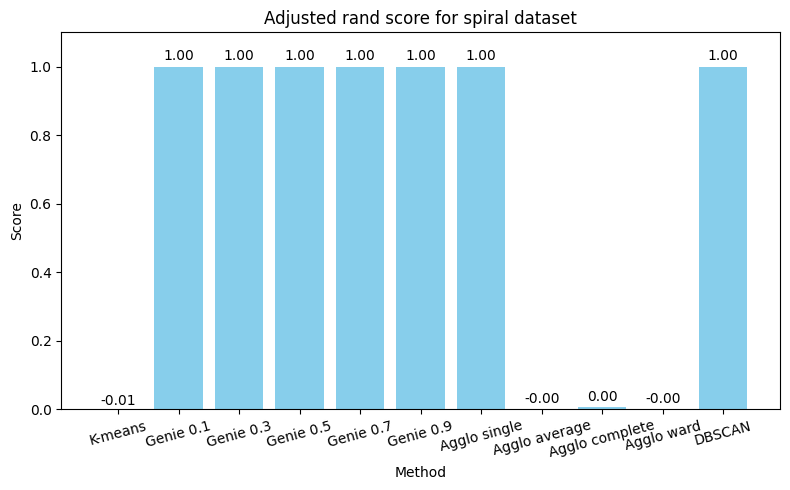

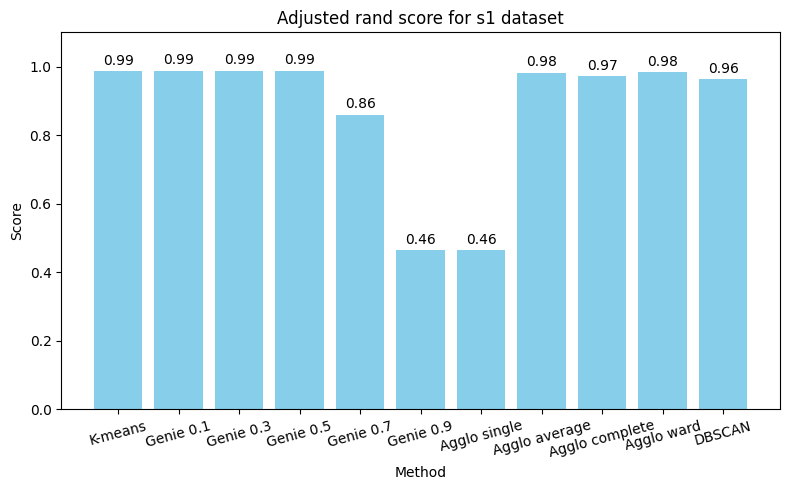

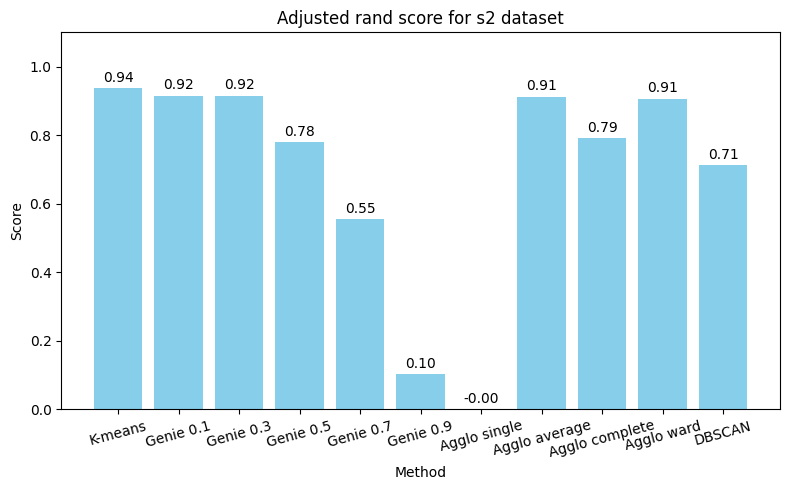

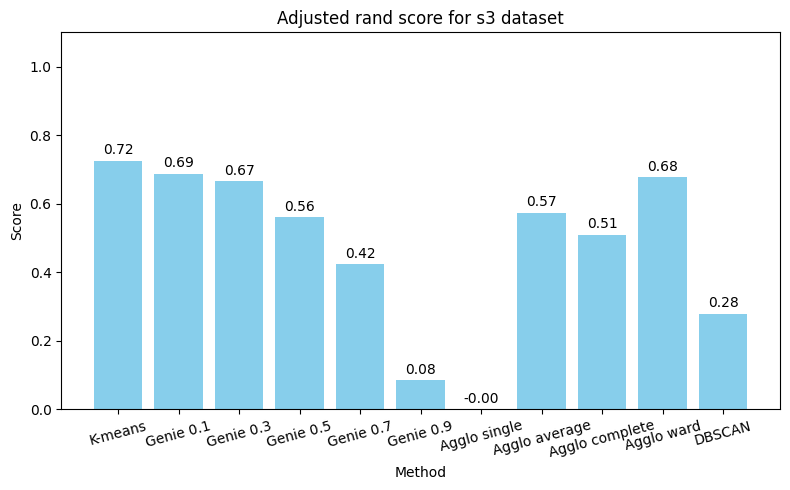

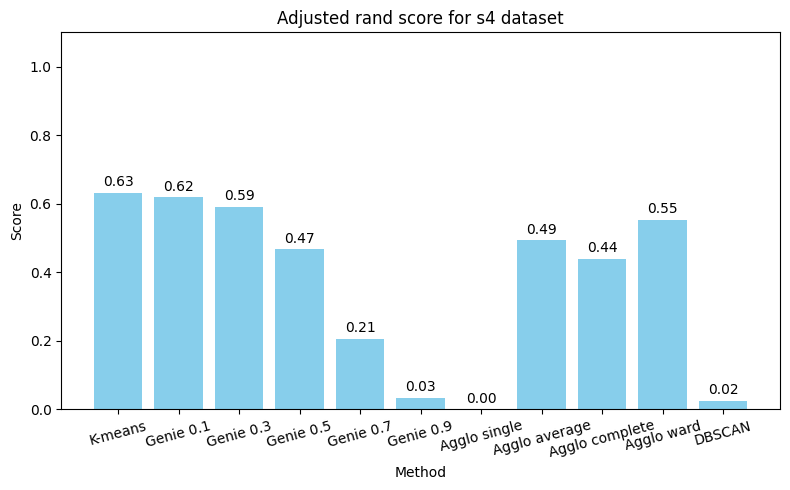

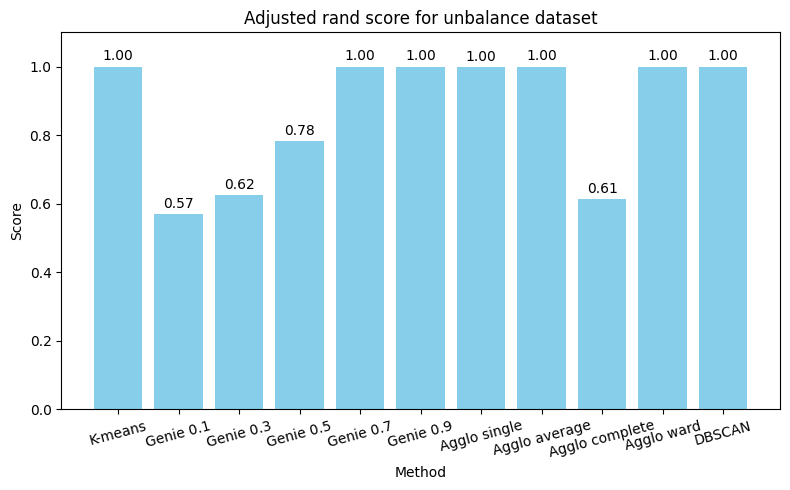

In [27]:
for sip in sipu_collection: 
    scores = all_dataset_results[sip]
    plot_scores(scores)